In [2]:

import findspark
findspark.init()

from pyspark.sql import SparkSession
from pyspark.sql.functions import col, round as spark_round
from pyspark.sql.functions import col, mean

# 初始化 Spark 会话
spark = SparkSession.builder.appName('iteration3').getOrCreate()


Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/05/15 23:23:53 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [3]:
#!/Users/zhoudaozhen/anaconda3/bin/python -m pip install findspark
#!/Users/zhoudaozhen/anaconda3/bin/python -m pip install pyspark

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql import SparkSession
import os
import numpy as np
import warnings
#from sklearn.experimental import enable_iterative_imputer 
#from sklearn.impute import IterativeImputer

warnings.filterwarnings('ignore', category=FutureWarning)


In [5]:
from pyspark.sql.types import StructType, StructField, StringType, DoubleType, IntegerType
schema = StructType([
    StructField("Country", StringType(), True),
    StructField("Region", StringType(), True),
    StructField("Happiness Score", DoubleType(), True),
    StructField("Standard error of ladder score", DoubleType(), True),
    StructField("Whisker.high", DoubleType(), True),
    StructField("Whisker.low", DoubleType(), True),
    StructField("Logged GDP per capita", DoubleType(), True),
    StructField("Social support", DoubleType(), True),
    StructField("Healthy life expectancy", DoubleType(), True),
    StructField("Freedom to make life choices", DoubleType(), True),
    StructField("Generosity", DoubleType(), True),
    StructField("Perceptions of corruption", DoubleType(), True),
    StructField("Ladder score in Dystopia", DoubleType(), True),
    StructField("Economy (GDP per Capita)", DoubleType(), True),
    StructField("Explained by: Social support", DoubleType(), True),
    StructField("Health (Life Expectancy)", DoubleType(), True),
    StructField("Freedom", DoubleType(), True),
    StructField("Generosity", DoubleType(), True),
    StructField("Trust (Government Corruption)", DoubleType(), True),
    StructField("Dystopia Residual", DoubleType(), True),
    StructField("Year", IntegerType(), True),
    StructField("Happiness Rank", IntegerType(), True)
])

In [6]:
# 分别为每个年份创建DataFrame
data_2013 = spark.read.csv("2013.csv", header=True, inferSchema=True)
data_2015 = spark.read.csv("2015.csv", header=True, inferSchema=True)
data_2016 = spark.read.csv("2016.csv", header=True, inferSchema=True)
data_2017 = spark.read.csv("2017.csv", header=True, inferSchema=True)
data_2018 = spark.read.csv("2018.csv", header=True, inferSchema=True)
data_2019 = spark.read.csv("2019.csv", header=True, inferSchema=True)
data_2020 = spark.read.csv("2020.csv", header=True, inferSchema=True)
data_2021 = spark.read.csv("2021.csv", header=True, inferSchema=True)
data_2022 = spark.read.csv("2022.csv", header=True, inferSchema=True)
data_2023 = spark.read.csv("2023.csv", header=True, inferSchema=True)




In [7]:
data_2013.show()

+----+--------------------+------+---------------+--------------+-------+-----------------------------+--------+----------+---------------+---------------+---------------------+------------------------+------------------------+--------------+
|Year|             Country|Region|Happiness Score|Social Support|Freedom|Trust (Government Corruption)|Donation|Generosity|Positive Affect|Negative Affect|Happiness (Yesterday)|Economy (GDP per Capita)|Health (Life Expectancy)|Happiness Rank|
+----+--------------------+------+---------------+--------------+-------+-----------------------------+--------+----------+---------------+---------------+---------------------+------------------------+------------------------+--------------+
|2013|             Denmark|     0|          7.693|         0.963|  0.937|                        0.176|   0.629|     0.222|          0.776|          0.179|                0.647|                 32333.0|                  71.228|             1|
|2013|              Norway| 

In [8]:



data_frames = []
common_columns = None

for year in range(2013, 2024):
    if year != 2014:
        file_path = os.path.join("", f"{year}.csv")
        if os.path.exists(file_path):
            df = spark.read.csv(file_path, header=True, inferSchema=True)
            data_frames.append(df)
            if common_columns is None:
                common_columns = set(df.columns)
            else:
                common_columns.intersection_update(df.columns)

filtered_data_frames = [df[list(common_columns)] for df in data_frames]

#combined_data = pd.concat(filtered_data_frames, ignore_index=True)
combined_data = filtered_data_frames[0]
for df in filtered_data_frames[1:]:
    combined_data = combined_data.union(df)


#data_attribute = pd.read_excel('P_Data_Extract_From_World_Development_Indicators.xlsx')

data_attribute =spark.read.csv("P_Data_Extract_From_World_Development_Indicators.csv", header=True, inferSchema=True)


In [9]:
combined_data.show()

+-------+---------------+--------------------+-----------------------------+--------------+------------------------+----+------------------------+
|Freedom|Happiness Score|             Country|Trust (Government Corruption)|Happiness Rank|Economy (GDP per Capita)|Year|Health (Life Expectancy)|
+-------+---------------+--------------------+-----------------------------+--------------+------------------------+----+------------------------+
|  0.937|          7.693|             Denmark|                        0.176|             1|                 32333.0|2013|                  71.228|
|  0.947|          7.655|              Norway|                        0.421|             2|                 48071.0|2013|                  72.492|
|  0.918|           7.65|         Switzerland|                        0.319|             3|                 39476.0|2013|                  73.561|
|  0.908|          7.512|         Netherlands|                        0.378|             4|                 36854.0|20

In [10]:
data_2013.show(15)

+----+--------------------+------+---------------+--------------+-------+-----------------------------+--------+----------+---------------+---------------+---------------------+------------------------+------------------------+--------------+
|Year|             Country|Region|Happiness Score|Social Support|Freedom|Trust (Government Corruption)|Donation|Generosity|Positive Affect|Negative Affect|Happiness (Yesterday)|Economy (GDP per Capita)|Health (Life Expectancy)|Happiness Rank|
+----+--------------------+------+---------------+--------------+-------+-----------------------------+--------+----------+---------------+---------------+---------------------+------------------------+------------------------+--------------+
|2013|             Denmark|     0|          7.693|         0.963|  0.937|                        0.176|   0.629|     0.222|          0.776|          0.179|                0.647|                 32333.0|                  71.228|             1|
|2013|              Norway| 

In [11]:
data_2013.describe()

DataFrame[summary: string, Year: string, Country: string, Region: string, Happiness Score: string, Social Support: string, Freedom: string, Trust (Government Corruption): string, Donation: string, Generosity: string, Positive Affect: string, Negative Affect: string, Happiness (Yesterday): string, Economy (GDP per Capita): string, Health (Life Expectancy): string, Happiness Rank: string]

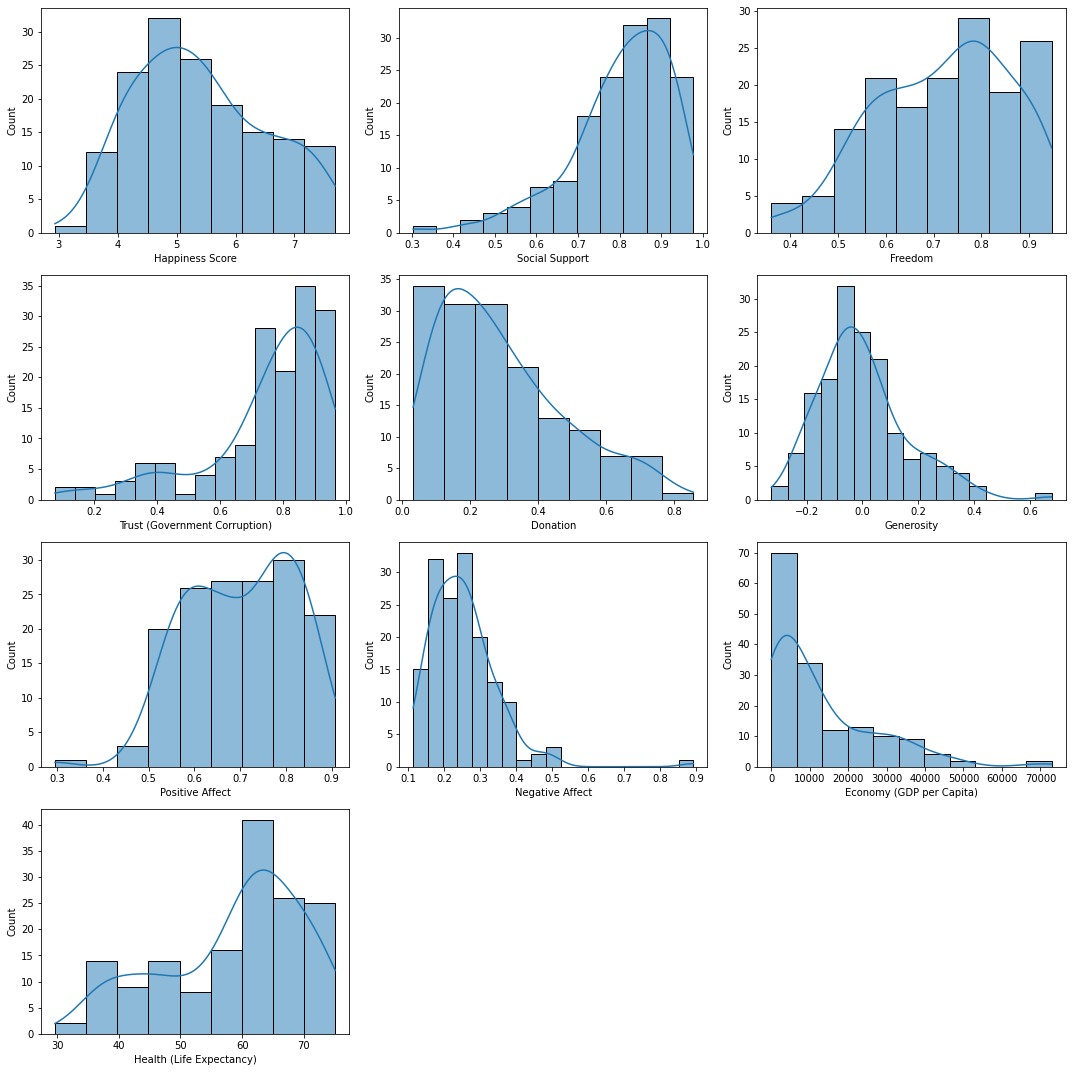

In [34]:
# 选择数值型数据列
#numerical_cols = data_2013.select_dtypes(include=['number']).columns
numerical_cols = [field.name for field in data_2013.schema.fields if field.dataType.simpleString() == 'double']
numerical_cols = [col for col in numerical_cols if col not in ['Year', 'Happiness (Yesterday)']]

data_2013_pd = data_2013.toPandas()

# 设置画布大小
plt.figure(figsize=(15, len(numerical_cols) // 3 * 5))

# 为每个数值型属性画图
for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols) // 3 + 1, 3, i + 1)  # 确保有足够的行数容纳所有图
    sns.histplot(data_2013_pd[col], kde=True)

# 调整子图间距
plt.tight_layout()
#plt.savefig("/Users/zhoudaozhen/Desktop/722/iteration3/pic/9", format='png')
plt.show()


In [ ]:
data_2020.describe().show()

24/05/15 01:42:49 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Country, Region, Happiness Score, Standard error of ladder score, Whisker.high, Whisker.low, Logged GDP per capita, Social support, Healthy life expectancy, Freedom to make life choices, Generosity, Perceptions of corruption, Ladder score in Dystopia, Economy (GDP per Capita), Explained by: Social support, Health (Life Expectancy), Freedom, Generosity, Trust (Government Corruption), Dystopia Residual, Year, Happiness Rank
 Schema: Country, Region, Happiness Score, Standard error of ladder score, Whisker.high, Whisker.low, Logged GDP per capita, Social support, Healthy life expectancy, Freedom to make life choices, Generosity10, Perceptions of corruption, Ladder score in Dystopia, Economy (GDP per Capita), Explained by: Social support, Health (Life Expectancy), Freedom, Generosity17, Trust (Government Corruption), Dystopia Residual, Year, Happiness Rank
Expected: Generosity10 but found: Generosi

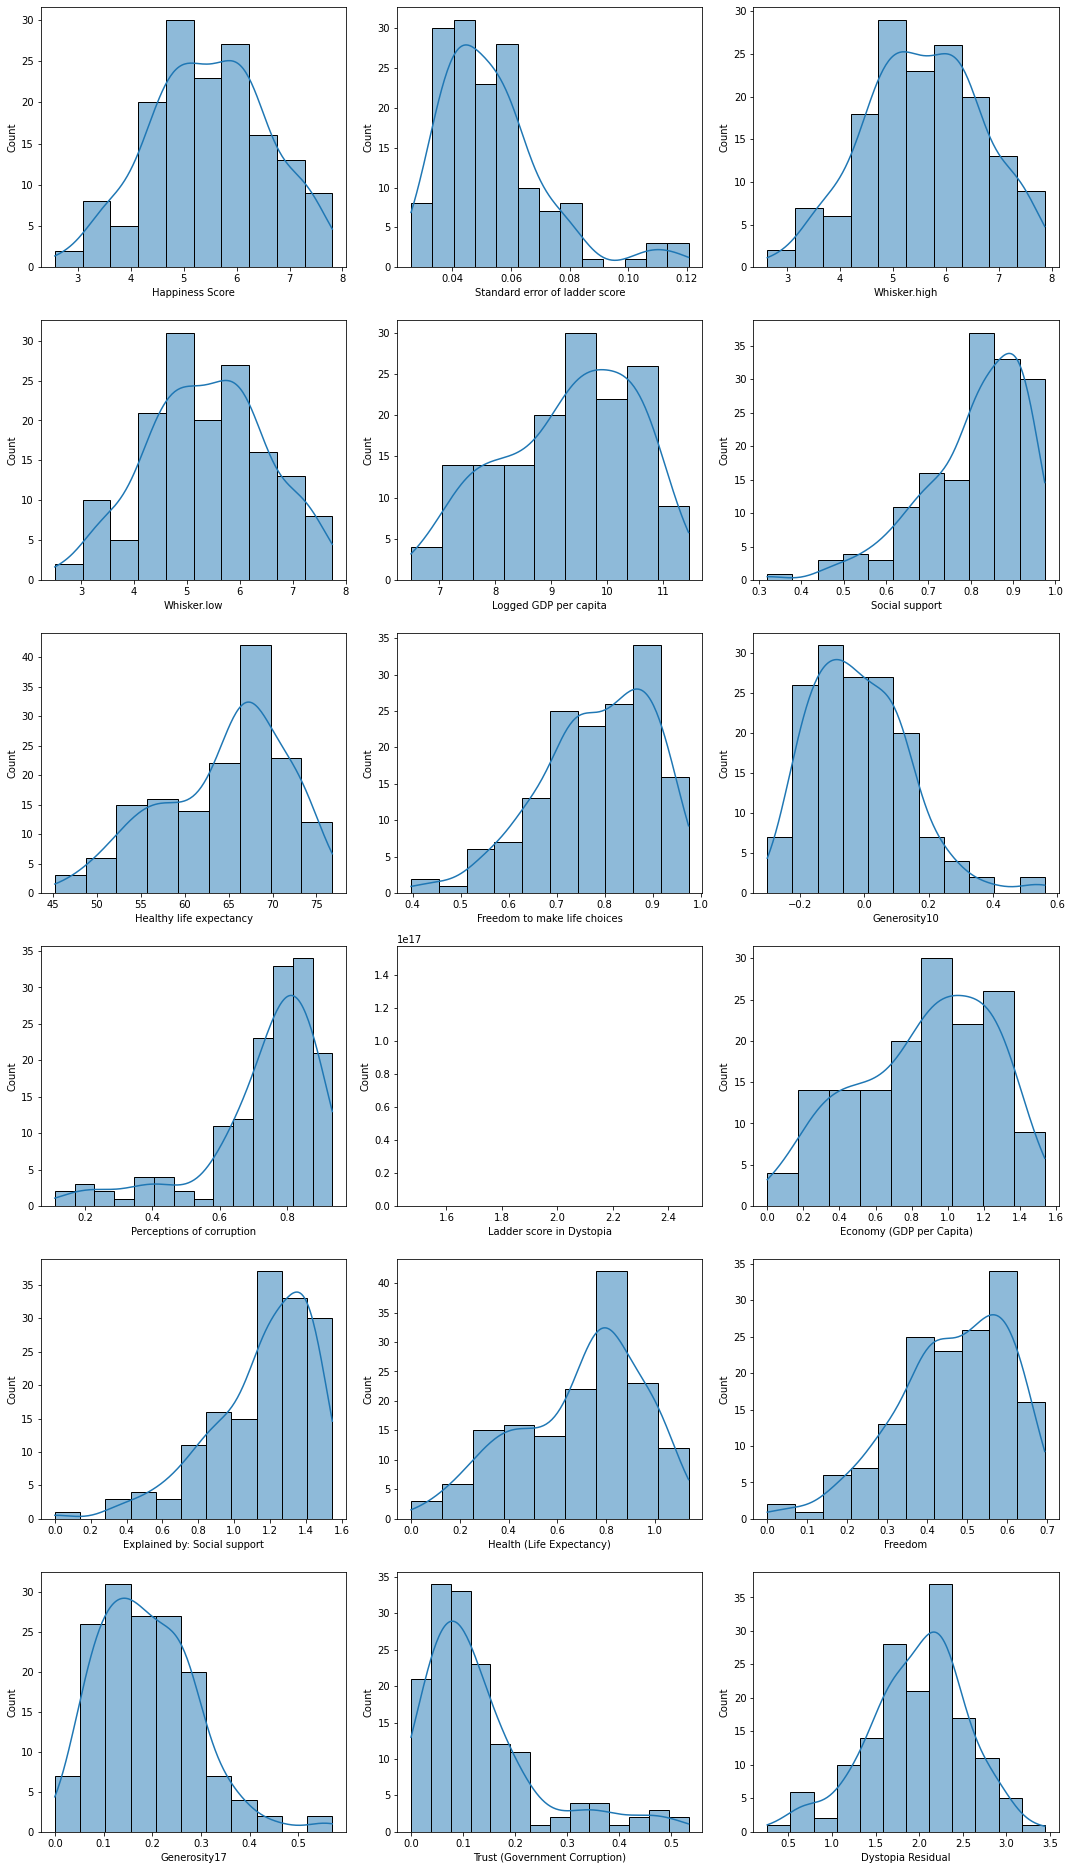

In [49]:

numerical_cols = [field.name for field in data_2020.schema.fields if field.dataType.simpleString() == 'double']
numerical_cols = [col for col in numerical_cols if col not in ['Year', 'Happiness (Yesterday)']]

data_2020_pd = data_2020.toPandas()

# 设置画布大小
plt.figure(figsize=(15, len(numerical_cols) // 3 * 5))

# 为每个数值型属性画图
for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols) // 3 + 1, 3, i + 1)  # 确保有足够的行数容纳所有图
    sns.histplot(data_2020_pd[col], kde=True)

# 调整子图间距
plt.tight_layout()
#plt.savefig("/Users/zhoudaozhen/Desktop/722/iteration3/pic/12", format='png')
plt.show()


In [12]:
# 获取行数
num_rows = combined_data.count()

# 获取列数
num_columns = len(combined_data.columns)

# 打印结果
print(f"number of rows: {num_rows}, number of columns: {num_columns}")


number of rows: 1524, number of columns: 8


In [13]:
data_2013.printSchema()
num_rows = data_2013.count()
num_columns = len(data_2013.columns)
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

for column in data_2013.columns:
    non_null_count = data_2013.filter(data_2013[column].isNotNull()).count()
    print(f"Column '{column}': non-null values = {non_null_count}")


root
 |-- Year: integer (nullable = true)
 |-- Country: string (nullable = true)
 |-- Region: integer (nullable = true)
 |-- Happiness Score: double (nullable = true)
 |-- Social Support: double (nullable = true)
 |-- Freedom: double (nullable = true)
 |-- Trust (Government Corruption): double (nullable = true)
 |-- Donation: double (nullable = true)
 |-- Generosity: double (nullable = true)
 |-- Positive Affect: double (nullable = true)
 |-- Negative Affect: double (nullable = true)
 |-- Happiness (Yesterday): double (nullable = true)
 |-- Economy (GDP per Capita): double (nullable = true)
 |-- Health (Life Expectancy): double (nullable = true)
 |-- Happiness Rank: integer (nullable = true)

Number of rows: 156
Number of columns: 15
Column 'Year': non-null values = 156
Column 'Country': non-null values = 156
Column 'Region': non-null values = 156
Column 'Happiness Score': non-null values = 156
Column 'Social Support': non-null values = 156
Column 'Freedom': non-null values = 156
Colum

In [14]:
from pyspark.sql.functions import round

# 获取描述性统计信息
describe_df = combined_data.describe()

# 对数值列进行四舍五入
rounded_describe_df = describe_df.select(
    describe_df["summary"],
    *[round(describe_df[col], 2).alias(col) for col in describe_df.columns if col != "summary"]
)

# 显示结果
rounded_describe_df.show()


+-------+------+------------------------+-----------------------------+-------+-------+--------------+------------------------+---------------+
|summary|  Year|Health (Life Expectancy)|Trust (Government Corruption)|Country|Freedom|Happiness Rank|Economy (GDP per Capita)|Happiness Score|
+-------+------+------------------------+-----------------------------+-------+-------+--------------+------------------------+---------------+
|  count|1524.0|                  1521.0|                       1522.0| 1524.0| 1523.0|        1524.0|                  1524.0|         1524.0|
|   mean|2018.3|                   12.82|                          0.2|   null|   0.51|         76.82|                  1324.2|           5.44|
| stddev|  3.02|                   24.86|                         0.22|   null|    0.2|         44.21|                 5955.93|           1.12|
|    min|2013.0|                     0.0|                          0.0|   null|    0.0|           1.0|                     0.0|         

In [15]:
# 获取行数
num_rows = data_attribute.count()

# 获取列数
num_columns = len(data_attribute.columns)

# 打印结果
print(f"number of rows: {num_rows}, number of columns: {num_columns}")


number of rows: 2665, number of columns: 125


In [16]:
# 打印数据框的模式
data_attribute.printSchema()

# 获取行数和列数
num_rows = data_attribute.count()
num_columns = len(data_attribute.columns)

# 打印行数和列数
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

# 统计每一列的非空值数量
for column in data_attribute.columns:
    non_null_count = data_attribute.filter(data_attribute[column].isNotNull()).count()
    print(f"Column '{column}': non-null values = {non_null_count}")


root
 |-- Time: string (nullable = true)
 |-- Time Code: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- Country Code: string (nullable = true)
 |-- Access to clean fuels and technologies for cooking (% of population) [EG.CFT.ACCS.ZS]: string (nullable = true)
 |-- Access to electricity (% of population) [EG.ELC.ACCS.ZS]: string (nullable = true)
 |-- Account ownership at a financial institution or with a mobile-money-service provider (% of population ages 15+) [FX.OWN.TOTL.ZS]: string (nullable = true)
 |-- Adequacy of social insurance programs (% of total welfare of beneficiary households) [per_si_allsi.adq_pop_tot]: string (nullable = true)
 |-- Adequacy of social safety net programs (% of total welfare of beneficiary households) [per_sa_allsa.adq_pop_tot]: string (nullable = true)
 |-- Adequacy of unemployment benefits and ALMP (% of total welfare of beneficiary households) [per_lm_alllm.adq_pop_tot]: string (nullable = true)
 |-- Adjusted net enrollment rate, 

AnalysisException: Cannot resolve column name "Access to clean fuels and technologies for cooking (% of population) [EG.CFT.ACCS.ZS]" among (Time, Time Code, Country, Country Code, Access to clean fuels and technologies for cooking (% of population) [EG.CFT.ACCS.ZS], Access to electricity (% of population) [EG.ELC.ACCS.ZS], Account ownership at a financial institution or with a mobile-money-service provider (% of population ages 15+) [FX.OWN.TOTL.ZS], Adequacy of social insurance programs (% of total welfare of beneficiary households) [per_si_allsi.adq_pop_tot], Adequacy of social safety net programs (% of total welfare of beneficiary households) [per_sa_allsa.adq_pop_tot], Adequacy of unemployment benefits and ALMP (% of total welfare of beneficiary households) [per_lm_alllm.adq_pop_tot], Adjusted net enrollment rate, primary (% of primary school age children) [SE.PRM.TENR], Adjusted net national income (annual % growth) [NY.ADJ.NNTY.KD.ZG], Adjusted savings: carbon dioxide damage (% of GNI) [NY.ADJ.DCO2.GN.ZS], Adjusted savings: consumption of fixed capital (current US$) [NY.ADJ.DKAP.CD], Adjusted savings: gross savings (% of GNI) [NY.ADJ.ICTR.GN.ZS], Adolescent fertility rate (births per 1,000 women ages 15-19) [SP.ADO.TFRT], Adolescents out of school (% of lower secondary school age) [SE.SEC.UNER.LO.ZS], Adults (ages 15+) and children (ages 0-14) newly infected with HIV [SH.HIV.INCD.TL], Agricultural land (sq. km) [AG.LND.AGRI.K2], Age dependency ratio (% of working-age population) [SP.POP.DPND], Agriculture, forestry, and fishing, value added (current US$) [NV.AGR.TOTL.CD], Air transport, passengers carried [IS.AIR.PSGR], Arable land (% of land area) [AG.LND.ARBL.ZS], Armed forces personnel, total [MS.MIL.TOTL.P1], Arms exports (SIPRI trend indicator values) [MS.MIL.XPRT.KD], Arms imports (SIPRI trend indicator values) [MS.MIL.MPRT.KD], Average working hours of children, study and work, ages 7-14 (hours per week) [SL.TLF.0714.SW.TM], Bank capital to assets ratio (%) [FB.BNK.CAPA.ZS], Benefit incidence of social insurance programs to poorest quintile (% of total social insurance benefits) [per_si_allsi.ben_q1_tot], Binding coverage, all products (%) [TM.TAX.MRCH.BC.ZS], Cause of death, by injury (% of total) [SH.DTH.INJR.ZS], Cause of death, by non-communicable diseases (% of total) [SH.DTH.NCOM.ZS], Central government debt, total (current LCU) [GC.DOD.TOTL.CN], Charges for the use of intellectual property, payments (BoP, current US$) [BM.GSR.ROYL.CD], Charges for the use of intellectual property, receipts (BoP, current US$) [BX.GSR.ROYL.CD], Children (0-14) living with HIV [SH.HIV.0014], Children in employment, total (% of children ages 7-14) [SL.TLF.0714.ZS], Children in employment, wage workers (% of children in employment, ages 7-14) [SL.WAG.0714.ZS], Claims on central government, etc. (% GDP) [FS.AST.CGOV.GD.ZS], CO2 emissions (metric tons per capita) [EN.ATM.CO2E.PC], CO2 emissions (kg per 2015 US$ of GDP) [EN.ATM.CO2E.KD.GD], Commercial service exports (current US$) [TX.VAL.SERV.CD.WT], Commercial service imports (current US$) [TM.VAL.SERV.CD.WT], Completeness of birth registration (%) [SP.REG.BRTH.ZS], Compensation of employees (current LCU) [GC.XPN.COMP.CN], Condom use, population ages 15-24, female (% of females ages 15-24) [SH.CON.1524.FE.ZS], Condom use, population ages 15-24, male (% of males ages 15-24) [SH.CON.1524.MA.ZS], Computer, communications and other services (% of commercial service imports) [TM.VAL.OTHR.ZS.WT], Consumption of iodized salt (% of households) [SN.ITK.SALT.ZS], Consumer price index (2010 = 100) [FP.CPI.TOTL], Contraceptive prevalence, any method (% of married women ages 15-49) [SP.DYN.CONU.ZS], Contributing family workers, total (% of total employment) (modeled ILO estimate) [SL.FAM.WORK.ZS], Cost of business start-up procedures (% of GNI per capita) [IC.REG.COST.PC.ZS], Cost to export, border compliance (US$) [IC.EXP.CSBC.CD], Cost to import, border compliance (US$) [IC.IMP.CSBC.CD], Coverage of social insurance programs (% of population) [per_si_allsi.cov_pop_tot], Coverage of social insurance programs in poorest quintile (% of population) [per_si_allsi.cov_q1_tot], Coverage of social insurance programs in richest quintile (% of population) [per_si_allsi.cov_q5_tot], Coverage of social safety net programs (% of population) [per_sa_allsa.cov_pop_tot], Coverage of unemployment benefits and ALMP (% of population) [per_lm_alllm.cov_pop_tot], CPIA building human resources rating (1=low to 6=high) [IQ.CPA.HRES.XQ], CPIA business regulatory environment rating (1=low to 6=high) [IQ.CPA.BREG.XQ], CPIA debt policy rating (1=low to 6=high) [IQ.CPA.DEBT.XQ], CPIA economic management cluster average (1=low to 6=high) [IQ.CPA.ECON.XQ], CPIA efficiency of revenue mobilization rating (1=low to 6=high) [IQ.CPA.REVN.XQ], CPIA equity of public resource use rating (1=low to 6=high) [IQ.CPA.PRES.XQ], CPIA financial sector rating (1=low to 6=high) [IQ.CPA.FINS.XQ], CPIA fiscal policy rating (1=low to 6=high) [IQ.CPA.FISP.XQ], CPIA gender equality rating (1=low to 6=high) [IQ.CPA.GNDR.XQ], CPIA macroeconomic management rating (1=low to 6=high) [IQ.CPA.MACR.XQ], CPIA policies for social inclusion/equity cluster average (1=low to 6=high) [IQ.CPA.SOCI.XQ], CPIA policy and institutions for environmental sustainability rating (1=low to 6=high) [IQ.CPA.ENVR.XQ], CPIA property rights and rule-based governance rating (1=low to 6=high) [IQ.CPA.PROP.XQ], CPIA public sector management and institutions cluster average (1=low to 6=high) [IQ.CPA.PUBS.XQ], CPIA quality of budgetary and financial management rating (1=low to 6=high) [IQ.CPA.FINQ.XQ], CPIA transparency, accountability, and corruption in the public sector rating (1=low to 6=high) [IQ.CPA.TRAN.XQ], CPIA trade rating (1=low to 6=high) [IQ.CPA.TRAD.XQ], CPIA structural policies cluster average (1=low to 6=high) [IQ.CPA.STRC.XQ], CPIA social protection rating (1=low to 6=high) [IQ.CPA.PROT.XQ], CPIA quality of public administration rating (1=low to 6=high) [IQ.CPA.PADM.XQ], Current education expenditure, total (% of total expenditure in public institutions) [SE.XPD.CTOT.ZS], Customs and other import duties (current LCU) [GC.TAX.IMPT.CN], Current health expenditure (% of GDP) [SH.XPD.CHEX.GD.ZS], Diabetes prevalence (% of population ages 20 to 79) [SH.STA.DIAB.ZS], Droughts, floods, extreme temperatures (% of population, average 1990-2009) [EN.CLC.MDAT.ZS], Ease of doing business rank (1=most business-friendly regulations) [IC.BUS.EASE.XQ], Educational attainment, at least completed short-cycle tertiary, population 25+, total (%) (cumulative) [SE.TER.CUAT.ST.ZS], Electric power consumption (kWh per capita) [EG.USE.ELEC.KH.PC], Employment to population ratio, ages 15-24, total (%) (modeled ILO estimate) [SL.EMP.1524.SP.ZS], Expenditure on tertiary education (% of government expenditure on education) [SE.XPD.TERT.ZS], Export volume index (2015 = 100) [TX.QTY.MRCH.XD.WD], Fertility rate, total (births per woman) [SP.DYN.TFRT.IN], Firms with female participation in ownership (% of firms) [IC.FRM.FEMO.ZS], Firms with female top manager (% of firms) [IC.FRM.FEMM.ZS], Fixed broadband subscriptions (per 100 people) [IT.NET.BBND.P2], Fixed telephone subscriptions (per 100 people) [IT.MLT.MAIN.P2], Forest area (% of land area) [AG.LND.FRST.ZS], GDP (constant LCU) [NY.GDP.MKTP.KN], Gini index [SI.POV.GINI], Human capital index (HCI) (scale 0-1) [HD.HCI.OVRL], Households and NPISHs Final consumption expenditure (current LCU) [NE.CON.PRVT.CN], Import volume index (2015 = 100) [TM.QTY.MRCH.XD.WD], Imports of goods and services (annual % growth) [NE.IMP.GNFS.KD.ZG], Imports of goods and services (% of GDP) [NE.IMP.GNFS.ZS], Imports of goods and services (BoP, current US$) [BM.GSR.GNFS.CD], Imports of goods, services and primary income (BoP, current US$) [BM.GSR.TOTL.CD], Incidence of HIV, ages 15-24 (per 1,000 uninfected population ages 15-24) [SH.HIV.INCD.YG.P3], Individuals using the Internet (% of population) [IT.NET.USER.ZS], Inflation, consumer prices (annual %) [FP.CPI.TOTL.ZG], Intentional homicides (per 100,000 people) [VC.IHR.PSRC.P5], Insurance and financial services (% of service exports, BoP) [BX.GSR.INSF.ZS], Internally displaced persons, new displacement associated with conflict and violence (number of cases) [VC.IDP.NWCV], Labor force with advanced education, female (% of female working-age population with advanced education) [SL.TLF.ADVN.FE.ZS], Labor force with advanced education (% of total working-age population with advanced education) [SL.TLF.ADVN.ZS], Labor force, female (% of total labor force) [SL.TLF.TOTL.FE.ZS], Labor force, total [SL.TLF.TOTL.IN], Literacy rate, adult female (% of females ages 15 and above) [SE.ADT.LITR.FE.ZS], Life expectancy at birth, total (years) [SP.DYN.LE00.IN], Manufactures exports (% of merchandise exports) [TX.VAL.MANF.ZS.UN], Manufactures imports (% of merchandise imports) [TM.VAL.MANF.ZS.UN], Merchandise exports (current US$) [TX.VAL.MRCH.CD.WT], Merchandise imports (current US$) [TM.VAL.MRCH.CD.WT], Military expenditure (% of GDP) [MS.MIL.XPND.GD.ZS], Military expenditure (current LCU) [MS.MIL.XPND.CN], Mortality rate, neonatal (per 1,000 live births) [SH.DYN.NMRT]); did you mean to quote the `Access to clean fuels and technologies for cooking (% of population) [EG.CFT.ACCS.ZS]` column?

In [42]:
from pyspark.sql.functions import col

# 打印数据框的模式
data_attribute.printSchema()

# 获取行数和列数
num_rows = data_attribute.count()
num_columns = len(data_attribute.columns)

# 打印行数和列数
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

# 统计每一列的非空值数量
for column in data_attribute.columns:
    non_null_count = data_attribute.filter(col(f"`{column}`").isNotNull()).count()
    print(f"Column '{column}': non-null values = {non_null_count}")


root
 |-- Time: string (nullable = true)
 |-- Time Code: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- Country Code: string (nullable = true)
 |-- Access to clean fuels and technologies for cooking (% of population) [EG.CFT.ACCS.ZS]: string (nullable = true)
 |-- Access to electricity (% of population) [EG.ELC.ACCS.ZS]: string (nullable = true)
 |-- Account ownership at a financial institution or with a mobile-money-service provider (% of population ages 15+) [FX.OWN.TOTL.ZS]: string (nullable = true)
 |-- Adequacy of social insurance programs (% of total welfare of beneficiary households) [per_si_allsi.adq_pop_tot]: string (nullable = true)
 |-- Adequacy of social safety net programs (% of total welfare of beneficiary households) [per_sa_allsa.adq_pop_tot]: string (nullable = true)
 |-- Adequacy of unemployment benefits and ALMP (% of total welfare of beneficiary households) [per_lm_alllm.adq_pop_tot]: string (nullable = true)
 |-- Adjusted net enrollment rate, 

In [12]:
from pyspark.sql.functions import col, when
from pyspark.sql.types import DoubleType, IntegerType
data_attribute = data_attribute.select([when(col(f"`{c}`") == '..', None).otherwise(col(f"`{c}`")).alias(c) for c in data_attribute.columns])



In [13]:
from pyspark.sql.types import DoubleType

# 将指定的列转换为数值类型
columns_to_convert = data_attribute.columns[4:]
for col_name in columns_to_convert:
    data_attribute = data_attribute.withColumn(col_name, col(f"`{col_name}`").cast(DoubleType()))

# 再次打印数据框的模式，确认转换
data_attribute.printSchema()

# 显示更改后的 DataFrame
data_attribute.show()

# 获取行数和列数
num_rows = data_attribute.count()
num_columns = len(data_attribute.columns)

# 打印行数和列数
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

# 统计每一列的非空值数量
for column in data_attribute.columns:
    non_null_count = data_attribute.filter(col(f"`{column}`").isNotNull()).count()
    print(f"Column '{column}': non-null values = {non_null_count}")

root
 |-- Time: string (nullable = true)
 |-- Time Code: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- Country Code: string (nullable = true)
 |-- Access to clean fuels and technologies for cooking (% of population) [EG.CFT.ACCS.ZS]: double (nullable = true)
 |-- Access to electricity (% of population) [EG.ELC.ACCS.ZS]: double (nullable = true)
 |-- Account ownership at a financial institution or with a mobile-money-service provider (% of population ages 15+) [FX.OWN.TOTL.ZS]: double (nullable = true)
 |-- Adequacy of social insurance programs (% of total welfare of beneficiary households) [per_si_allsi.adq_pop_tot]: double (nullable = true)
 |-- Adequacy of social safety net programs (% of total welfare of beneficiary households) [per_sa_allsa.adq_pop_tot]: double (nullable = true)
 |-- Adequacy of unemployment benefits and ALMP (% of total welfare of beneficiary households) [per_lm_alllm.adq_pop_tot]: double (nullable = true)
 |-- Adjusted net enrollment rate, 

24/05/15 23:24:34 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+----+---------+-------------------+------------+-------------------------------------------------------------------------------------+--------------------------------------------------------+--------------------------------------------------------------------------------------------------------------------------------+---------------------------------------------------------------------------------------------------------------+----------------------------------------------------------------------------------------------------------------+--------------------------------------------------------------------------------------------------------------------+--------------------------------------------------------------------------------------+------------------------------------------------------------------+----------------------------------------------------------------------+-----------------------------------------------------------------------------+----------------------------------

In [19]:
data_attribute.show()

+----+---------+-------------------+------------+-------------------------------------------------------------------------------------+--------------------------------------------------------+--------------------------------------------------------------------------------------------------------------------------------+---------------------------------------------------------------------------------------------------------------+----------------------------------------------------------------------------------------------------------------+--------------------------------------------------------------------------------------------------------------------+--------------------------------------------------------------------------------------+------------------------------------------------------------------+----------------------------------------------------------------------+-----------------------------------------------------------------------------+----------------------------------

/home/ubuntu/.local/lib/python3.10/site-packages/pyspark/sql/pandas/conversion.py:202: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[column_name] = series
/home/ubuntu/.local/lib/python3.10/site-packages/pyspark/sql/pandas/conversion.py:202: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[column_name] = series
/home/ubuntu/.local/lib/python3.10/site-packages/pyspark/sql/pandas/conversion.py:202: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

MemoryError: Unable to allocate 667. GiB for an array with shape (89574853905,) and data type float64

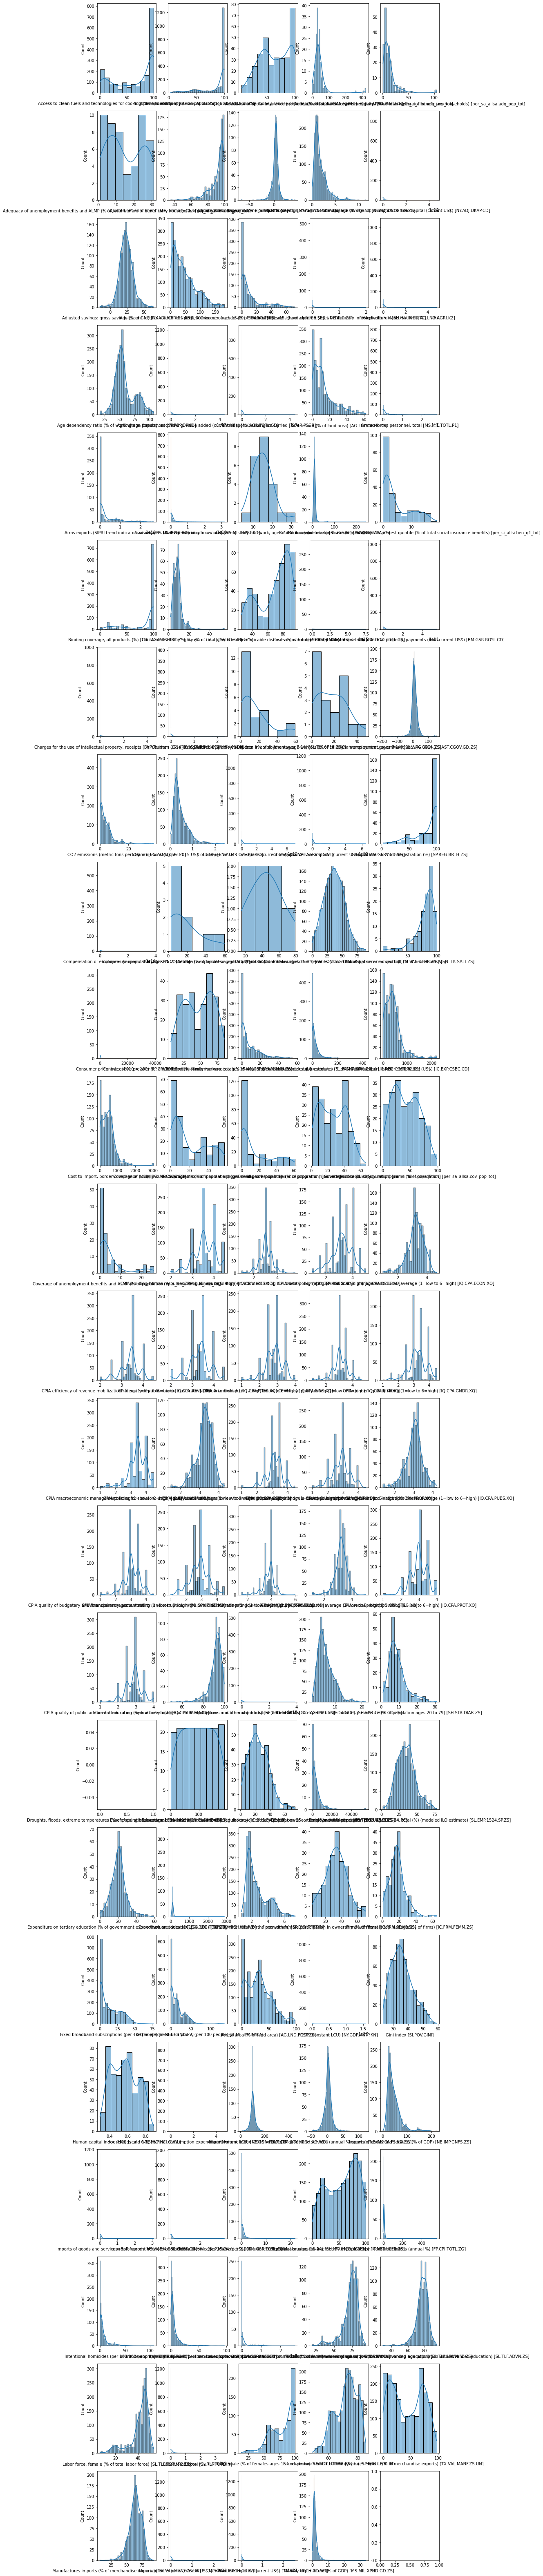

In [67]:
# 将 DataFrame 转换为 Pandas DataFrame 以便使用 matplotlib 和 seaborn
data_attribute_pd = data_attribute.toPandas()

# 选择数值型数据列
numerical_cols = data_attribute_pd.select_dtypes(include=['number']).columns
numerical_cols = [col for col in numerical_cols if col not in ['Year', 'Happiness (Yesterday)', 'Happiness Rank']]

# 设置画布大小
plt.figure(figsize=(15, len(numerical_cols) // 5 * 5))

# 为每个数值型属性画图
for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols) // 5 + 1, 5, i + 1)  # 确保有足够的行数容纳所有图
    sns.histplot(data_attribute_pd[col], kde=True)

# 调整子图间距
plt.tight_layout()
#plt.savefig("/Users/zhoudaozhen/Desktop/722/iteration3/pic/17.png", format='png')
plt.show()

In [71]:
from pyspark.sql.functions import col as pyspark_col
import networkx as nx
# 提取唯一的区域
regions = data_2015.select("Region").distinct().rdd.flatMap(lambda x: x).collect()

# 每行显示三张图
num_cols = 3
num_rows = int(np.ceil(len(regions) / num_cols))

fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 5, num_rows * 5))

for i, region in enumerate(regions):
    # 选择当前region的子DataFrame
    sub_df = data_2015.filter(pyspark_col('Region') == region).select('Country').rdd.flatMap(lambda x: x).collect()
    
    # 创建该region的图
    G = nx.Graph()
    G.add_node(region)  # 添加地区节点
    for country in sub_df:
        G.add_node(country)  # 添加国家节点
        G.add_edge(region, country)  # 创建边
    
    # 计算布局
    pos = nx.circular_layout(G)  # 为了简单起见，我们使用圆形布局
    
    # 计算当前子图的行列位置
    row = i // num_cols
    col = i % num_cols
    
    # 在子图上绘制网络图
    nx.draw(G, pos, ax=axes[row, col], with_labels=True)
    axes[row, col].set_title(region)
    
    # 如果当前行的图表数量不足，关闭剩余的子图
    if i == len(regions) - 1:
        for j in range(i + 1, num_rows * num_cols):
            fig.delaxes(axes.flatten()[j])

plt.tight_layout()
#plt.savefig("/Users/zhoudaozhen/Desktop/722/iteration3/Figures/1.png", format='png')
plt.show()

ModuleNotFoundError: No module named 'networkx'

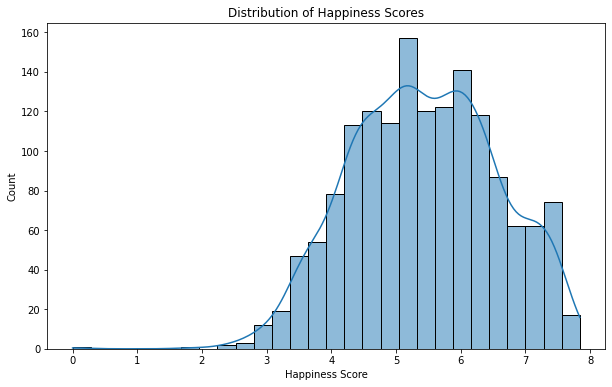

In [73]:
#3. 分布图（Distribution Plots）
# 绘制Happiness Score的分布
happiness_scores = combined_data.select('Happiness Score').toPandas()

# 绘制分布图
plt.figure(figsize=(10, 6))
sns.histplot(happiness_scores['Happiness Score'], kde=True)
plt.title('Distribution of Happiness Scores')
#plt.savefig("/Users/zhoudaozhen/Desktop/722/iteration3/Figures/2.png", format='png')
plt.show()

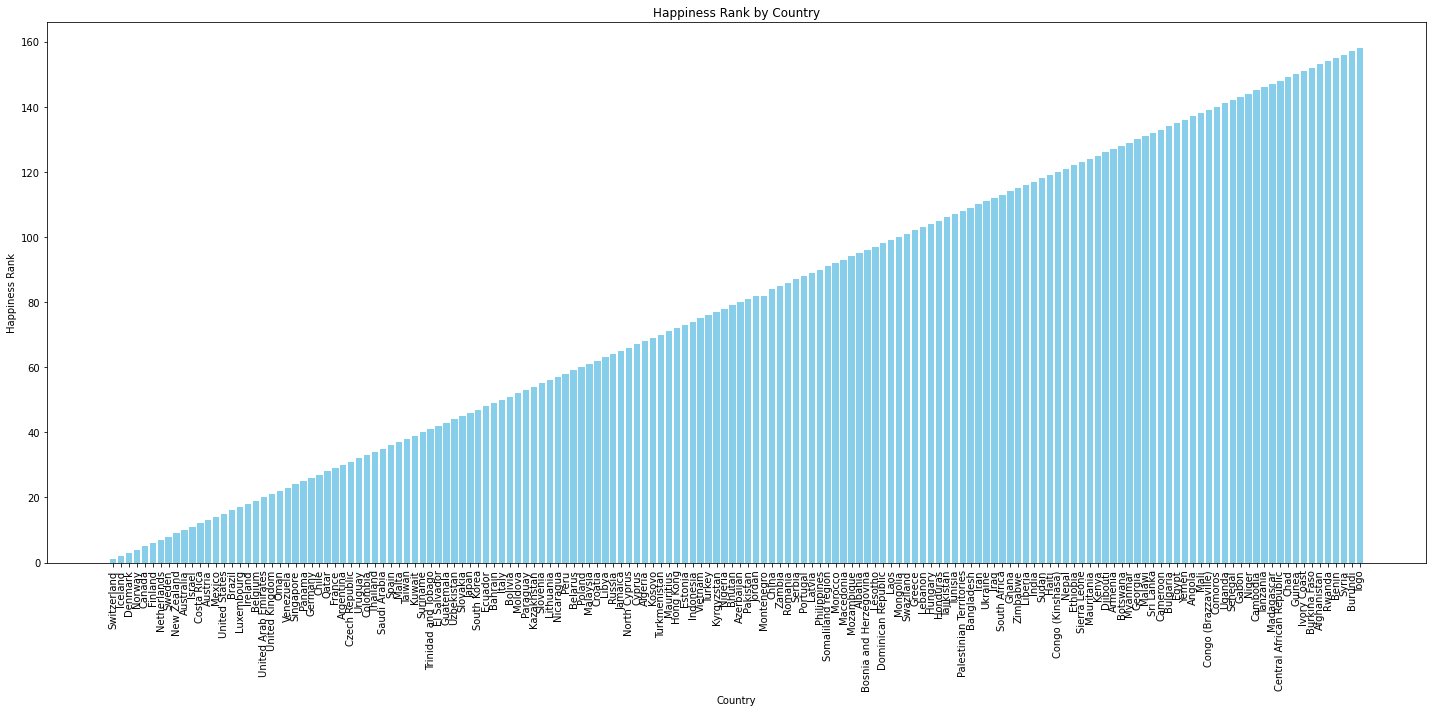

In [74]:
# 对数据按照Happiness Rank进行排序
df_sorted = data_2015.orderBy('Happiness Rank')

# 将排序后的数据转换为Pandas DataFrame
df_sorted_pandas = df_sorted.select('Country', 'Happiness Rank').toPandas()

# 绘制直方图
plt.figure(figsize=(20, 10))  # 可以根据国家数量调整大小
plt.bar(df_sorted_pandas['Country'], df_sorted_pandas['Happiness Rank'], color='skyblue')

# 添加标题和轴标签
plt.title('Happiness Rank by Country')
plt.xlabel('Country')
plt.ylabel('Happiness Rank')

# 旋转x轴标签，以便国家名可以清晰地显示
plt.xticks(rotation=90)

# 在显示之前调整布局
plt.tight_layout()

# 保存图像
#plt.savefig("/Users/zhoudaozhen/Desktop/722/iteration3/Figures/3.png", format='png')
plt.show()


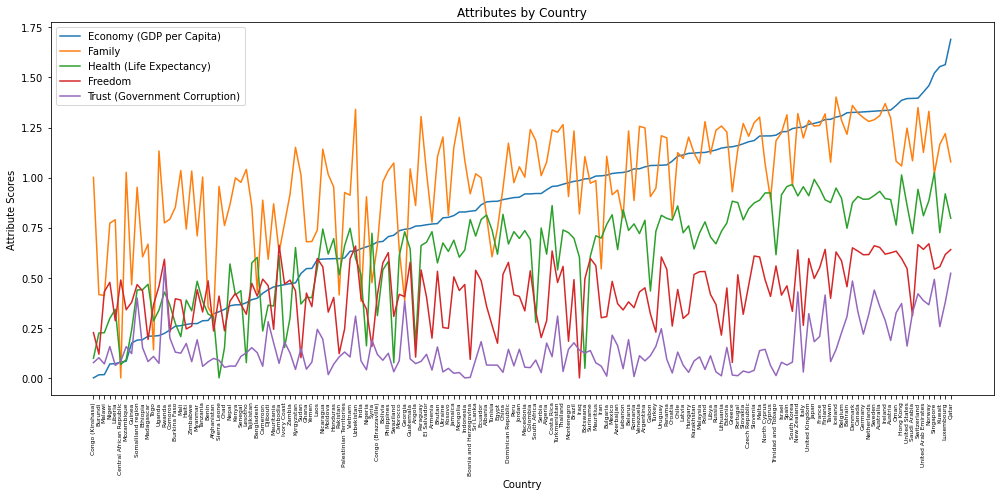

In [76]:
# 对数据按照'Economy (GDP per Capita)'进行排序
data_2015_sorted = data_2015.orderBy('Economy (GDP per Capita)')

# 将排序后的数据转换为Pandas DataFrame
data_2015_sorted_pandas = data_2015_sorted.select(
    'Country', 
    'Economy (GDP per Capita)', 
    'Family', 
    'Health (Life Expectancy)', 
    'Freedom', 
    'Trust (Government Corruption)'
).toPandas()

# 创建一个新的图形
plt.figure(figsize=(14, 7))

# 对于每个属性，绘制一个线图
for feature in ['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)']:
    plt.plot(data_2015_sorted_pandas['Country'], data_2015_sorted_pandas[feature], marker='', label=feature)

# 添加图例
plt.legend()

# 设置标题和轴标签
plt.title('Attributes by Country')
plt.xlabel('Country')
plt.ylabel('Attribute Scores')

# 旋转x轴的标签，以便国家名可以清晰地显示
plt.xticks(fontsize=6, rotation=90)

# 使用tight_layout确保所有的标签和标题都适合
plt.tight_layout()
#plt.savefig("/Users/zhoudaozhen/Desktop/722/iteration3/Figures/4.png", format='png')
# 显示图表
plt.show()

<Figure size 864x576 with 0 Axes>

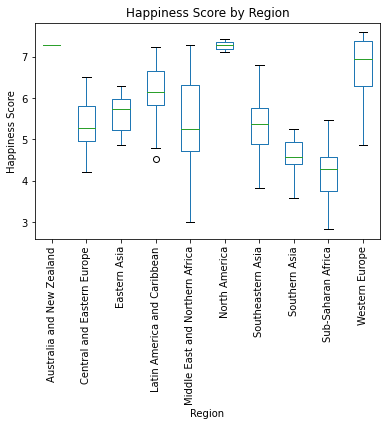

In [77]:
# 将数据转换为Pandas DataFrame以便绘制箱型图
data_2015_pandas = data_2015.select('Happiness Score', 'Region').toPandas()

# 绘制箱型图
plt.figure(figsize=(12, 8))  # 设置图形大小
boxplot = data_2015_pandas.boxplot(column=['Happiness Score'], by='Region', grid=False)

# 设置标题和轴标签
plt.title('Happiness Score by Region')
plt.suptitle('')  # 移除默认的子标题
plt.xlabel('Region')
plt.ylabel('Happiness Score')

# 旋转x轴的标签，以便区域名可以清晰地显示
plt.xticks(rotation=90)
#plt.savefig("/Users/zhoudaozhen/Desktop/722/iteration3/Figures/5.png", format='png')
# 显示图表
plt.show()

In [ ]:
#5. 成对关系（Pair Plots）
# 选择数值类型的列来绘制成对关系
# 选择数值类型的列并转换为Pandas DataFrame
numerical_data = combined_data.select('Happiness Score', 'Economy (GDP per Capita)', 'Health (Life Expectancy)', 'Freedom').toPandas()

# 绘制成对关系图
plt.figure(figsize=(12, 8))
sns.pairplot(numerical_data)
#plt.savefig("/Users/zhoudaozhen/Desktop/722/iteration3/Figures/6.png", format='png')
plt.show()


In [14]:
#dataatt = pd.read_excel('P_Data_Extract_From_World_Development_Indicators (3).xlsx')
dataatt =spark.read.csv("P_Data_Extract_From_World_Development_Indicators (3).csv", header=True, inferSchema=True)

In [47]:
dataatt.show() 

+----+-------------------+------------+--------------------------------------------------------+--------------------------------------------------------------------------------------+------------------------------------------------------------------+-----------------------------------------------------------------+-------------------------------------------------------------------------------+---------------------------------------------------------------------------+---------------------------------------------------------+-------------------------------------------------------------------+-------------------------------------------------+-----------------------------------------------------------------+--------------------------------------------------------------------------------------------------+-----------------------------------------------+----------------------------------------+------------------------------------------------------------------------------+-------------------

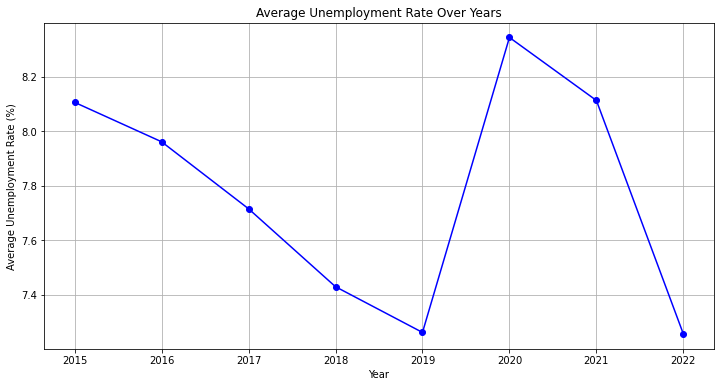

In [88]:
from pyspark.sql.functions import mean

# 选择所需列并重命名
data_selected = dataatt.selectExpr(
    "`Year` as Year",
    "`Unemployment, total (% of total labor force) (modeled ILO estimate) [SL.UEM.TOTL.ZS]` as Unemployment_Rate"
)

# 删除失业率为空的行
data_clean = data_selected.dropna(subset=['Unemployment_Rate'])

# 将Unemployment_Rate列转换为浮点数
data_clean = data_clean.withColumn("Unemployment_Rate", col("Unemployment_Rate").cast("float"))

# 计算每年的平均失业率
yearly_average = data_clean.groupBy('Year').agg(mean('Unemployment_Rate').alias('Average_Unemployment_Rate')).orderBy('Year').toPandas()

# 绘制折线图
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))  # 调整图形大小
plt.plot(yearly_average['Year'], yearly_average['Average_Unemployment_Rate'], marker='o', linestyle='-', color='b')

# 添加标题和轴标签
plt.title('Average Unemployment Rate Over Years')
plt.xlabel('Year')
plt.ylabel('Average Unemployment Rate (%)')

# 显示网格
plt.grid(True)
#plt.savefig("/Users/zhoudaozhen/Desktop/722/iteration3/Figures/7.png", format='png')
# 显示图表
plt.show()


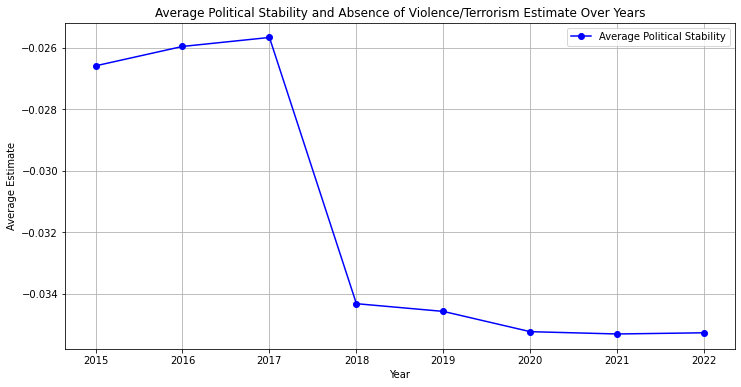

In [96]:
from pyspark.sql.functions import mean

# 选择所需列并重命名
data_selected = dataatt.selectExpr(
    "`Year` as Year",
    "`Political Stability and Absence of Violence/Terrorism: Estimate [PV.EST]` as Political_Stability"
)

# 删除政治稳定性评估为空的行
data_clean = data_selected.dropna(subset=["Political_Stability"])

# 将Political Stability列转换为浮点数
data_clean = data_clean.withColumn("Political_Stability", data_clean["Political_Stability"].cast("float"))

# 计算每年的平均政治稳定性评估
yearly_average_df = data_clean.groupBy("Year").agg(mean("Political_Stability").alias("Average_Political_Stability"))

yearly_average_pd = yearly_average_df.orderBy("Year").toPandas()
# 绘制折线图
plt.figure(figsize=(12, 6))  # 调整图形大小
plt.plot(yearly_average_pd["Year"], yearly_average_pd["Average_Political_Stability"], marker="o", linestyle="-", color="b", label="Average Political Stability")

# 添加标题和轴标签
plt.title("Average Political Stability and Absence of Violence/Terrorism Estimate Over Years")
plt.xlabel("Year")
plt.ylabel("Average Estimate")

# 显示图例
plt.legend()

# 显示网格
plt.grid(True)
#plt.savefig("/Users/zhoudaozhen/Desktop/722/iteration3/Figures/8.png", format="png")
# 显示图表
plt.show()


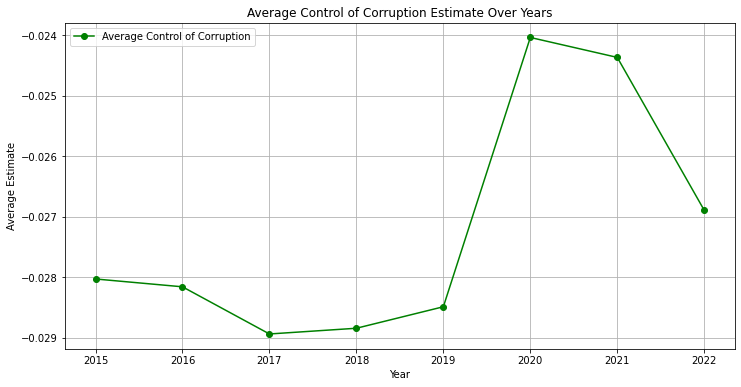

In [95]:
# 选择所需列并重命名
data_selected = dataatt.selectExpr(
    "`Year` as Year",
    "`Control of Corruption: Estimate [CC.EST]` as Control_of_Corruption"
)

# 删除“控制腐败评估”为空的行
data_clean = data_selected.dropna(subset=["Control_of_Corruption"])

# 将Control_of_Corruption列转换为浮点数
data_clean = data_clean.withColumn("Control_of_Corruption", data_clean["Control_of_Corruption"].cast("float"))

# 计算每年的平均“控制腐败评估”
yearly_average_df = data_clean.groupBy("Year").agg(mean("Control_of_Corruption").alias("Average_Control_of_Corruption"))

# 将结果转换为Pandas DataFrame以便绘图
yearly_average_pd = yearly_average_df.orderBy("Year").toPandas()

# 绘制折线图
plt.figure(figsize=(12, 6))  # 调整图形大小
plt.plot(yearly_average_pd["Year"], yearly_average_pd["Average_Control_of_Corruption"], marker="o", linestyle="-", color="green", label="Average Control of Corruption")

# 添加标题和轴标签
plt.title("Average Control of Corruption Estimate Over Years")
plt.xlabel("Year")
plt.ylabel("Average Estimate")

# 显示图例
plt.legend()

# 显示网格
plt.grid(True)
#plt.savefig("/Users/zhoudaozhen/Desktop/722/iteration3/Figures/9.png", format="png")
# 显示图表
plt.show()

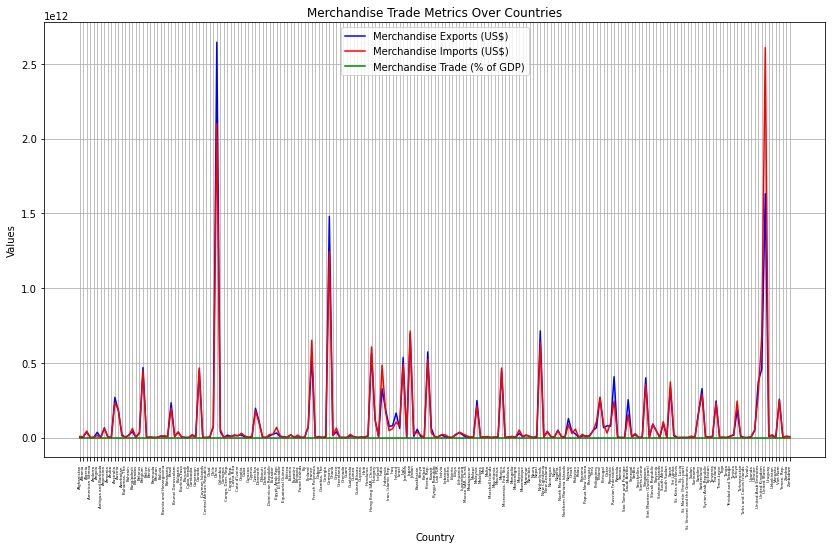

In [97]:
# 选择所需列并重命名
data_selected = dataatt.selectExpr(
    "`Country` as Country",
    "`Merchandise exports (current US$) [TX.VAL.MRCH.CD.WT]` as Merchandise_Exports",
    "`Merchandise imports (current US$) [TM.VAL.MRCH.CD.WT]` as Merchandise_Imports",
    "`Merchandise trade (% of GDP) [TG.VAL.TOTL.GD.ZS]` as Merchandise_Trade"
)

# 删除包含缺失值的行
data_clean = data_selected.dropna(subset=["Merchandise_Exports", "Merchandise_Imports", "Merchandise_Trade"])

# 将选定的列转换为浮点数
data_clean = data_clean.withColumn("Merchandise_Exports", data_clean["Merchandise_Exports"].cast("float"))
data_clean = data_clean.withColumn("Merchandise_Imports", data_clean["Merchandise_Imports"].cast("float"))
data_clean = data_clean.withColumn("Merchandise_Trade", data_clean["Merchandise_Trade"].cast("float"))

# 计算每个国家的平均值
country_average_df = data_clean.groupBy("Country").agg(
    mean("Merchandise_Exports").alias("Average_Exports"),
    mean("Merchandise_Imports").alias("Average_Imports"),
    mean("Merchandise_Trade").alias("Average_Trade")
)

# 将结果转换为Pandas DataFrame以便绘图
country_average_pd = country_average_df.orderBy("Country").toPandas()

# 绘制折线图
plt.figure(figsize=(14, 8))  # 调整图形大小
plt.plot(country_average_pd["Country"], country_average_pd["Average_Exports"], linestyle="-", color="blue", label="Merchandise Exports (US$)")
plt.plot(country_average_pd["Country"], country_average_pd["Average_Imports"], linestyle="-", color="red", label="Merchandise Imports (US$)")
plt.plot(country_average_pd["Country"], country_average_pd["Average_Trade"], linestyle="-", color="green", label="Merchandise Trade (% of GDP)")

# 添加标题和轴标签
plt.title("Merchandise Trade Metrics Over Countries")
plt.xlabel("Country")
plt.ylabel("Values")
plt.xticks(fontsize=4, rotation=90)

# 显示图例
plt.legend()

# 显示网格
plt.grid(True)
#plt.savefig("/Users/zhoudaozhen/Desktop/722/iteration3/Figures/10.png", format="png")
# 显示图表
plt.show()

In [98]:
combined_data.show()

+----+---------------+--------------+-----------------------------+------------------------+------------------------+--------------------+-------+
|Year|Happiness Score|Happiness Rank|Trust (Government Corruption)|Economy (GDP per Capita)|Health (Life Expectancy)|             Country|Freedom|
+----+---------------+--------------+-----------------------------+------------------------+------------------------+--------------------+-------+
|2013|          7.693|             1|                        0.176|                 32333.0|                  71.228|             Denmark|  0.937|
|2013|          7.655|             2|                        0.421|                 48071.0|                  72.492|              Norway|  0.947|
|2013|           7.65|             3|                        0.319|                 39476.0|                  73.561|         Switzerland|  0.918|
|2013|          7.512|             4|                        0.378|                 36854.0|                  72.338| 

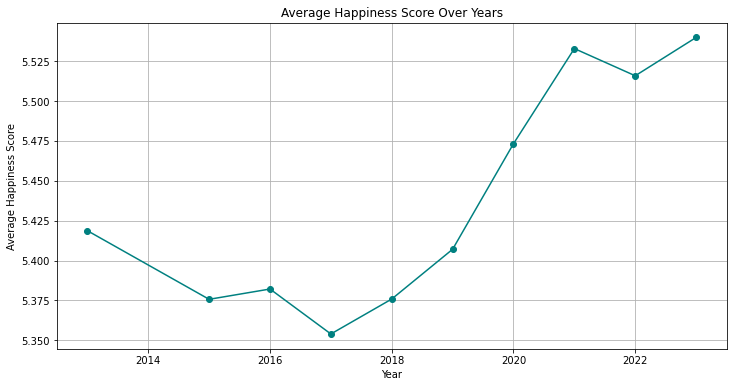

In [99]:
# 选择所需列并重命名
data_selected = combined_data.selectExpr(
    "`Year` as Year",
    "`Happiness Score` as Happiness_Score"
)

# 删除Happiness Score为空的行
data_clean = data_selected.dropna(subset=["Happiness_Score"])

# 将Happiness_Score列转换为浮点数
data_clean = data_clean.withColumn("Happiness_Score", data_clean["Happiness_Score"].cast("float"))

# 计算每年的平均Happiness Score
yearly_average_happiness = data_clean.groupBy("Year").agg(mean("Happiness_Score").alias("Average_Happiness_Score"))

# 将结果转换为Pandas DataFrame以便绘图
yearly_average_pd = yearly_average_happiness.orderBy("Year").toPandas()

# 绘制折线图
plt.figure(figsize=(12, 6))  # 调整图形大小
plt.plot(yearly_average_pd["Year"], yearly_average_pd["Average_Happiness_Score"], marker='o', linestyle='-', color='teal')

# 添加标题和轴标签
plt.title('Average Happiness Score Over Years')
plt.xlabel('Year')
plt.ylabel('Average Happiness Score')

# 显示网格
plt.grid(True)
#plt.savefig("/Users/zhoudaozhen/Desktop/722/iteration3/Figures/11.png", format='png')
# 显示图表
plt.show()

In [ ]:
data_2015

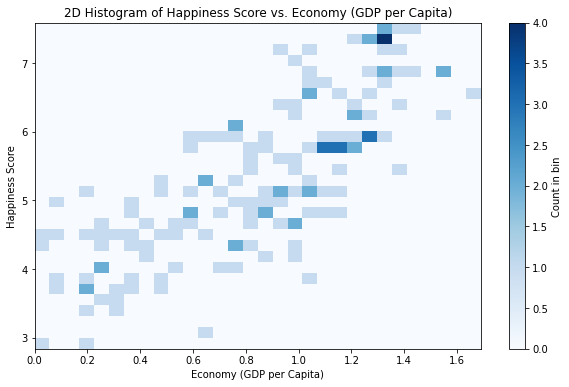

In [100]:
data_2015_clean = data_2015.dropna(subset=[
    'Economy (GDP per Capita)',
    'Happiness Score'
])

# 将相关列转换为浮点数
data_2015_clean = data_2015_clean.withColumn(
    'Economy (GDP per Capita)', col('Economy (GDP per Capita)').cast('float')
).withColumn(
    'Happiness Score', col('Happiness Score').cast('float')
)

# 将数据转换为Pandas DataFrame
data_2015_pd = data_2015_clean.select('Economy (GDP per Capita)', 'Happiness Score').toPandas()

# 绘制二维直方图
plt.figure(figsize=(10, 6))
plt.hist2d(data_2015_pd['Economy (GDP per Capita)'], data_2015_pd['Happiness Score'], bins=30, cmap='Blues')

# 添加颜色条
plt.colorbar(label='Count in bin')

# 添加标题和轴标签
plt.title('2D Histogram of Happiness Score vs. Economy (GDP per Capita)')
plt.xlabel('Economy (GDP per Capita)')
plt.ylabel('Happiness Score')
#plt.savefig("/Users/zhoudaozhen/Desktop/722/iteration3/Figures/12.png", format='png')
# 显示图表
plt.show()

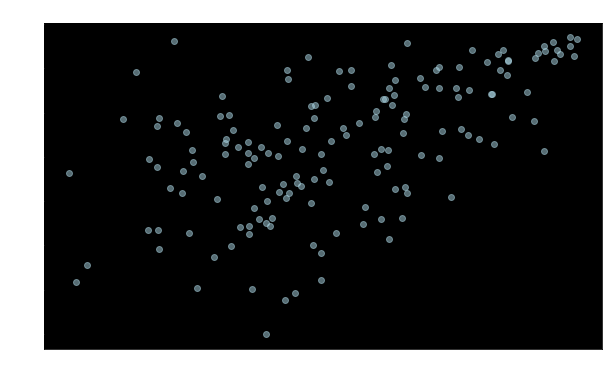

In [101]:
# 选择所需列并重命名
data_2015_clean = data_2015.selectExpr(
    "`Happiness Score` as happiness_score",
    "`Freedom` as freedom"
).dropna(subset=['freedom', 'happiness_score'])

# 将相关列转换为浮点数
data_2015_clean = data_2015_clean.withColumn(
    'freedom', col('freedom').cast('float')
).withColumn(
    'happiness_score', col('happiness_score').cast('float')
)

# 将数据转换为Pandas DataFrame
data_2015_pd = data_2015_clean.select('happiness_score', 'freedom').toPandas()

# 创建散点图
plt.figure(figsize=(10, 6))
plt.scatter(data_2015_pd['happiness_score'], data_2015_pd['freedom'], alpha=0.5, color='lightblue')

# 设置背景颜色为黑色
plt.gca().set_facecolor('black')

# 添加标题和轴标签
plt.title('Happiness Score vs. Freedom', color='white')
plt.xlabel('Happiness Score', color='white')
plt.ylabel('Freedom', color='white')

# 设置轴标签和标题的颜色为白色
plt.tick_params(colors='white')

# 保存并显示图表
#plt.savefig("/Users/zhoudaozhen/Desktop/722/iteration3/Figures/13.png", format='png')
plt.show()

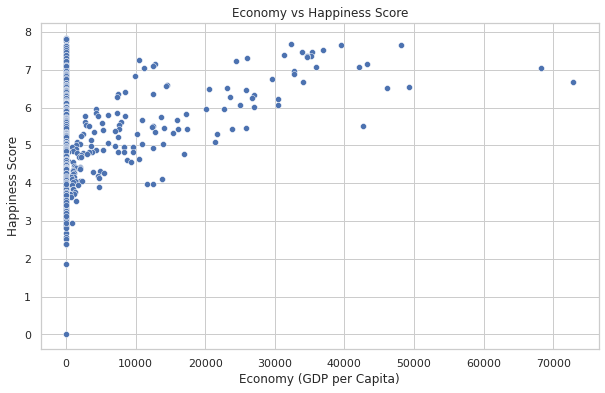

In [102]:
combined_data_clean = combined_data.selectExpr(
    "`Economy (GDP per Capita)` as economy_gdp_per_capita",
    "`Happiness Score` as happiness_score"
).dropna(subset=['economy_gdp_per_capita', 'happiness_score'])

# 将相关列转换为浮点数
combined_data_clean = combined_data_clean.withColumn(
    'economy_gdp_per_capita', col('economy_gdp_per_capita').cast('float')
).withColumn(
    'happiness_score', col('happiness_score').cast('float')
)

# 将数据转换为Pandas DataFrame
combined_data_pd = combined_data_clean.select('economy_gdp_per_capita', 'happiness_score').toPandas()

# 设置绘图风格
sns.set(style="whitegrid")

# 绘制Economy和Happiness Score的关系
plt.figure(figsize=(10, 6))
sns.scatterplot(x='economy_gdp_per_capita', y='happiness_score', data=combined_data_pd)
plt.title('Economy vs Happiness Score')
plt.xlabel('Economy (GDP per Capita)')
plt.ylabel('Happiness Score')
#plt.savefig("/Users/zhoudaozhen/Desktop/722/iteration3/Figures/14.png", format='png')
plt.show()

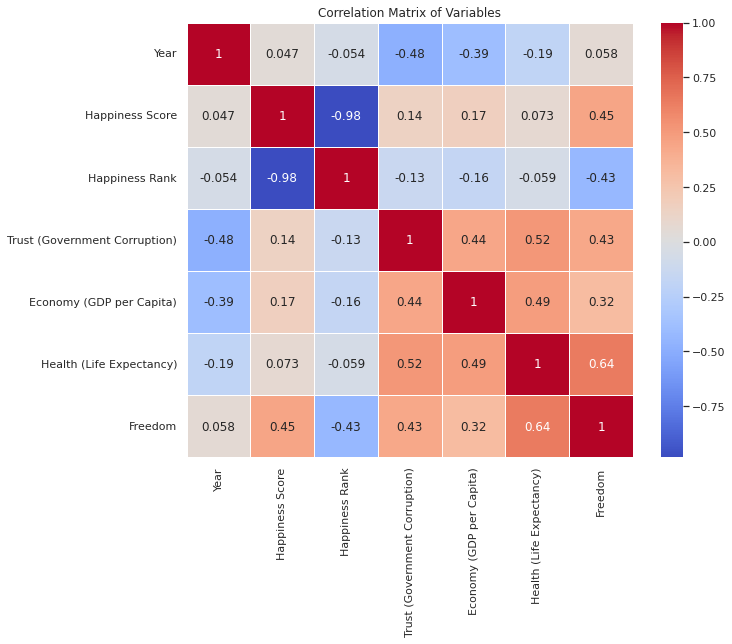

In [105]:

# 将数据转换为Pandas DataFrame
combined_data_pd = combined_data.toPandas()

# 生成相关矩阵图
plt.figure(figsize=(10, 8))
correlation_matrix = combined_data_pd.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix of Variables')
#plt.savefig("/Users/zhoudaozhen/Desktop/722/iteration3/Figures/16.png", format='png')
plt.show()

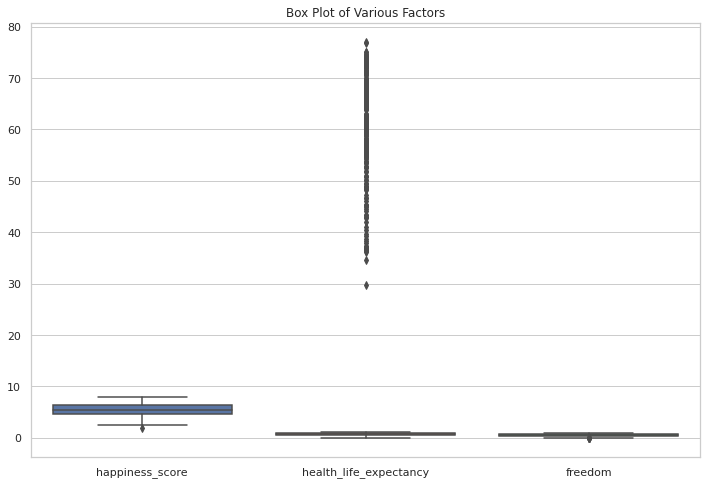

In [111]:
combined_data_clean = combined_data.selectExpr(
    "`Happiness Score` as happiness_score",
    "`Health (Life Expectancy)` as health_life_expectancy",
    "`Freedom` as freedom"
).dropna()
# 将数据转换为Pandas DataFrame
combined_data_pd = combined_data_clean.toPandas()

# 生成箱型图
plt.figure(figsize=(12, 8))
sns.boxplot(data=combined_data_pd)
plt.title('Box Plot of Various Factors')
#plt.savefig("/Users/zhoudaozhen/Desktop/722/iteration3/Figures/17.png", format='png')
plt.show()

In [ ]:
combined

In [ ]:
#先讲属性数据由于缺失数据表示成。。而全是字符串格式

In [121]:
data_attribute.show(10)

+----+---------+-------------------+------------+--------------------------------------------------+---------------------+------------------------------------------------------------------------------------+-------------------------------------+--------------------------------------+------------------------------------------+-------------------------------------+----------------------------+---------------------------------------+----------------------------------------------+-------------------------------+-------------------------+-------------------------+-------+-----------------+--------------------+-----------------------------------------------+-----------------------------------------------+-----------+----------------------------------------------+------------+------------+------------------------------------------------------------+----------------------------+------------------------------------------------------------------+------------------------------+-------------------

In [15]:
from pyspark.sql import functions as F

# 获取并修改列名
def rename_columns(columns):
    new_columns = []
    for col in columns:
        new_col = col.split(' (')[0].replace(' ', '_').replace('.', '_')
        if new_col not in new_columns:
            new_columns.append(new_col)
        else:
            count = 1
            while f"{new_col}_{count}" in new_columns:
                count += 1
            new_columns.append(f"{new_col}_{count}")
    return new_columns

# 生成新的列名
new_column_names = rename_columns(data_attribute.columns)
data_attribute = data_attribute.toDF(*new_column_names)

# 去除重复的列
data_attribute = data_attribute.select([F.col(f"`{c}`").alias(c) for c in new_column_names])

# 计算每列的缺失值数量
missing_values = data_attribute.select([
    F.count(F.when(F.column(f"`{c}`").isNull(), c)).alias(c) for c in data_attribute.columns
])

# 转换为 Pandas DataFrame 以便于遍历
missing_values_pd = missing_values.toPandas().T
missing_values_pd.columns = ['missing_count']
missing_values_pd = missing_values_pd.reset_index()

# 循环遍历每列的缺失值数量并打印
for row in missing_values_pd.itertuples():
    print(f"{row.Index}: {row.missing_count}")


/home/ubuntu/.local/lib/python3.10/site-packages/pyspark/sql/pandas/conversion.py:202: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[column_name] = series
/home/ubuntu/.local/lib/python3.10/site-packages/pyspark/sql/pandas/conversion.py:202: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[column_name] = series
/home/ubuntu/.local/lib/python3.10/site-packages/pyspark/sql/pandas/conversion.py:202: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

0: 3
1: 5
2: 5
3: 5
4: 769
5: 561
6: 2338
7: 2468
8: 2462
9: 2614
10: 1855
11: 1261
12: 728
13: 1052
14: 1029
15: 545
16: 1605
17: 1599
18: 601
19: 280
20: 488
21: 1041
22: 625
23: 1158
24: 2106
25: 1213
26: 2642
27: 1505
28: 2468
29: 1524
30: 2203
31: 2203
32: 2154
33: 892
34: 1110
35: 1851
36: 2642
37: 2646
38: 719
39: 992
40: 1024
41: 625
42: 609
43: 2388
44: 1601
45: 2656
46: 2658
47: 628
48: 2549
49: 1062
50: 2421
51: 551
52: 1242
53: 1489
54: 1489
55: 2457
56: 2457
57: 2457
58: 2447
59: 2557
60: 1618
61: 1618
62: 1618
63: 1618
64: 1618
65: 1618
66: 1618
67: 1618
68: 1618
69: 1618
70: 1618
71: 1618
72: 1618
73: 1618
74: 1618
75: 1618
76: 1618
77: 1618
78: 1618
79: 1618
80: 1955
81: 1812
82: 1004
83: 2405
84: 2665
85: 2476
86: 2312
87: 2474
88: 318
89: 2244
90: 1049
91: 599
92: 2460
93: 2460
94: 498
95: 460
96: 569
97: 798
98: 2024
99: 2167
100: 1121
101: 1049
102: 911
103: 657
104: 614
105: 614
106: 1468
107: 685
108: 632
109: 1513
110: 737
111: 2196
112: 1596
113: 1592
114: 318
1

/home/ubuntu/.local/lib/python3.10/site-packages/pyspark/sql/pandas/conversion.py:202: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[column_name] = series


In [49]:
data_attribute

DataFrame[Time: string, Time_Code: string, Country: string, Country_Code: string, Access_to_clean_fuels_and_technologies_for_cooking: double, Access_to_electricity: double, Account_ownership_at_a_financial_institution_or_with_a_mobile-money-service_provider: double, Adequacy_of_social_insurance_programs: double, Adequacy_of_social_safety_net_programs: double, Adequacy_of_unemployment_benefits_and_ALMP: double, Adjusted_net_enrollment_rate,_primary: double, Adjusted_net_national_income: double, Adjusted_savings:_carbon_dioxide_damage: double, Adjusted_savings:_consumption_of_fixed_capital: double, Adjusted_savings:_gross_savings: double, Adolescent_fertility_rate: double, Adolescents_out_of_school: double, Adults: double, Agricultural_land: double, Age_dependency_ratio: double, Agriculture,_forestry,_and_fishing,_value_added: double, Air_transport,_passengers_carried_[IS_AIR_PSGR]: double, Arable_land: double, Armed_forces_personnel,_total_[MS_MIL_TOTL_P1]: double, Arms_exports: double,

In [22]:
# 假设 combined_data 是 PySpark DataFrame
combined_data_pd = combined_data.toPandas()

# 计算每列的缺失值数量
missing_values = combined_data_pd.isnull().sum()

# 循环遍历每列的缺失值数量并打印
for column, missing_count in missing_values.items():
    print(f"{column}: {missing_count} ")


Year: 0 
Health (Life Expectancy): 3 
Trust (Government Corruption): 2 
Country: 0 
Freedom: 1 
Happiness Rank: 0 
Economy (GDP per Capita): 0 
Happiness Score: 0 


In [23]:
print(data_attribute.dtypes)

[('Time', 'string'), ('Time_Code', 'string'), ('Country', 'string'), ('Country_Code', 'string'), ('Access_to_clean_fuels_and_technologies_for_cooking', 'double'), ('Access_to_electricity', 'double'), ('Account_ownership_at_a_financial_institution_or_with_a_mobile-money-service_provider', 'double'), ('Adequacy_of_social_insurance_programs', 'double'), ('Adequacy_of_social_safety_net_programs', 'double'), ('Adequacy_of_unemployment_benefits_and_ALMP', 'double'), ('Adjusted_net_enrollment_rate,_primary', 'double'), ('Adjusted_net_national_income', 'double'), ('Adjusted_savings:_carbon_dioxide_damage', 'double'), ('Adjusted_savings:_consumption_of_fixed_capital', 'double'), ('Adjusted_savings:_gross_savings', 'double'), ('Adolescent_fertility_rate', 'double'), ('Adolescents_out_of_school', 'double'), ('Adults', 'double'), ('Agricultural_land', 'double'), ('Age_dependency_ratio', 'double'), ('Agriculture,_forestry,_and_fishing,_value_added', 'double'), ('Air_transport,_passengers_carried_[I

In [24]:
# 查找重复的条目
duplicates = data_attribute.groupBy(data_attribute.columns).count().filter("count > 1")
num_duplicates = duplicates.count()
print("Number of duplicate entries:", num_duplicates)


Number of duplicate entries: 1


In [53]:
# 找到重复的条目
duplicate_counts = data_attribute.groupBy(data_attribute.columns).agg(count("*").alias("count")).filter("count > 1")

# 使用唯一别名进行连接
data_attribute_with_id = data_attribute.withColumn("unique_id", col("Time"))

# 创建一个条件来标识重复条目
duplicate_conditions = [
    (data_attribute_with_id[c] == duplicate_counts[c]) for c in data_attribute.columns
]

# 将重复条目从原始DataFrame中删除
data_attribute_clean = data_attribute_with_id.join(duplicate_counts, duplicate_conditions, 'left_anti').drop("unique_id")

duplicates = data_attribute_clean.groupBy(data_attribute_clean.columns).count().filter("count > 1")
num_duplicates = duplicates.count()
print("Number of duplicate entries:", num_duplicates)



NameError: name 'count' is not defined

In [16]:
# 计算每列的缺失值数量
missing_counts = data_attribute.select([mean(col(c).isNull().cast("double")).alias(c) for c in data_attribute.columns])

# 转换为 Pandas DataFrame 以便于排序和打印
missing_counts_pd = missing_counts.toPandas().T
missing_counts_pd.columns = ["missing_ratio"]
missing_counts_pd["missing_ratio"] = missing_counts_pd["missing_ratio"] * 100

# 对缺失率进行排序，从高到低
missing_ratio_sorted = missing_counts_pd.sort_values(by="missing_ratio", ascending=False)

# 打印每列的缺失率，按从高到低排序
for row in missing_ratio_sorted.itertuples():
    print(f"{row.Index}: {row.missing_ratio:.2f}%")

/home/ubuntu/.local/lib/python3.10/site-packages/pyspark/sql/pandas/conversion.py:202: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[column_name] = series
/home/ubuntu/.local/lib/python3.10/site-packages/pyspark/sql/pandas/conversion.py:202: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[column_name] = series
/home/ubuntu/.local/lib/python3.10/site-packages/pyspark/sql/pandas/conversion.py:202: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

Droughts,_floods,_extreme_temperatures: 100.00%
Condom_use,_population_ages_15-24,_male: 99.74%
Condom_use,_population_ages_15-24,_female: 99.66%
Children_in_employment,_wage_workers: 99.29%
Children_in_employment,_total: 99.14%
Average_working_hours_of_children,_study_and_work,_ages_7-14: 99.14%
Adequacy_of_unemployment_benefits_and_ALMP: 98.09%
Coverage_of_unemployment_benefits_and_ALMP: 95.95%
Consumption_of_iodized_salt: 95.65%
Ease_of_doing_business_rank: 92.91%
Electric_power_consumption: 92.83%
Benefit_incidence_of_social_insurance_programs_to_poorest_quintile: 92.61%
Adequacy_of_social_insurance_programs: 92.61%
Adequacy_of_social_safety_net_programs: 92.38%
Firms_with_female_participation_in_ownership: 92.31%
Firms_with_female_top_manager: 92.31%
Coverage_of_social_insurance_programs: 92.20%
Coverage_of_social_insurance_programs_in_richest_quintile: 92.20%
Coverage_of_social_insurance_programs_in_poorest_quintile: 92.20%
Coverage_of_social_safety_net_programs: 91.82%
Contracep

/home/ubuntu/.local/lib/python3.10/site-packages/pyspark/sql/pandas/conversion.py:202: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[column_name] = series
/home/ubuntu/.local/lib/python3.10/site-packages/pyspark/sql/pandas/conversion.py:202: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[column_name] = series
/home/ubuntu/.local/lib/python3.10/site-packages/pyspark/sql/pandas/conversion.py:202: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

In [17]:


# 定义阈值
threshold = 30

# 找出缺失率高于阈值的列
columns_to_drop = missing_ratio_sorted[missing_ratio_sorted['missing_ratio'] > threshold].index

# 删除这些列
data_attribute = data_attribute.drop(*columns_to_drop)

# 显示处理后的 DataFrame
data_attribute.show()


+----+---------+-------------------+------------+--------------------------------------------------+---------------------+---------------------------------------+-------------------------+-----------------+--------------------+-----------------------------------------------+-----------+----------------------------------+--------------------------+--------------------------+-------------------------------------------+----------------------------------+-------------------------------------------------+---------------------+-----------------------------+-----------------------------+-----------+-------------+-------------------------------+-------------------------------+---------------------------------------------+------------------------------+--------------------------+--------------------------------+-------------------+-----------------------------------+-------------------------------+-------------------+-------------------+------------------------+
|Time|Time_Code|            Coun

In [18]:
# 计算每列的缺失值数量
missing_counts = data_attribute.select([mean(col(c).isNull().cast("double")).alias(c) for c in data_attribute.columns])

# 转换为 Pandas DataFrame 以便于排序和打印
missing_counts_pd = missing_counts.toPandas().T
missing_counts_pd.columns = ["missing_ratio"]
missing_counts_pd["missing_ratio"] = missing_counts_pd["missing_ratio"] * 100

# 对缺失率进行排序，从高到低
missing_ratio_sorted = missing_counts_pd.sort_values(by="missing_ratio", ascending=False)

# 打印每列的缺失率，按从高到低排序
for row in missing_ratio_sorted.itertuples():
    print(f"{row.Index}: {row.missing_ratio:.2f}%")

GDP: 29.94%
Access_to_clean_fuels_and_technologies_for_cooking: 28.86%
Insurance_and_financial_services: 27.65%
Adjusted_savings:_carbon_dioxide_damage: 27.32%
Claims_on_central_government,_etc_: 26.98%
Mortality_rate,_neonatal: 26.75%
Individuals_using_the_Internet: 25.70%
Imports_of_goods_and_services_1: 24.65%
Inflation,_consumer_prices: 23.71%
Computer,_communications_and_other_services: 23.56%
Arable_land: 23.45%
Commercial_service_exports: 23.45%
Imports_of_goods,_services_and_primary_income: 23.04%
Imports_of_goods_and_services_2: 23.04%
Commercial_service_imports: 22.85%
Life_expectancy_at_birth,_total: 22.70%
Agricultural_land: 22.55%
Fertility_rate,_total: 22.48%
Forest_area: 21.35%
Access_to_electricity: 21.05%
Contributing_family_workers,_total: 20.68%
Adolescent_fertility_rate: 20.45%
Fixed_broadband_subscriptions: 18.69%
Agriculture,_forestry,_and_fishing,_value_added: 18.31%
Fixed_telephone_subscriptions: 17.26%
Merchandise_exports: 15.20%
Merchandise_imports: 15.08%
Lab

In [19]:
 #计算每列的缺失值比例
missing_ratios = combined_data.select([(mean(col(c).isNull().cast("int"))).alias(c) for c in combined_data.columns])

# 转换为 Pandas DataFrame 以便于排序和打印
missing_ratios_pd = missing_ratios.toPandas().T
missing_ratios_pd.columns = ["missing_ratio"]
missing_ratios_pd["missing_ratio"] = missing_ratios_pd["missing_ratio"] * 100

# 对缺失率进行排序，从高到低
missing_ratios_sorted = missing_ratios_pd.sort_values(by="missing_ratio", ascending=False)

# 打印每列的缺失率，按从高到低排序
for row in missing_ratios_sorted.itertuples():
    print(f"{row.Index}: {row.missing_ratio:.2f}%")

Health (Life Expectancy): 0.20%
Trust (Government Corruption): 0.13%
Freedom: 0.07%
Happiness Score: 0.00%
Country: 0.00%
Happiness Rank: 0.00%
Economy (GDP per Capita): 0.00%
Year: 0.00%


In [ ]:
data_2015

24/05/15 05:30:09 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Country, Region, Happiness Score, Standard error of ladder score, Whisker.high, Whisker.low, Logged GDP per capita, Social support, Healthy life expectancy, Freedom to make life choices, Generosity, Perceptions of corruption, Ladder score in Dystopia, Economy (GDP per Capita), Explained by: Social support, Health (Life Expectancy), Freedom, Generosity, Trust (Government Corruption), Dystopia Residual, Year, Happiness Rank
 Schema: Country, Region, Happiness Score, Standard error of ladder score, Whisker.high, Whisker.low, Logged GDP per capita, Social support, Healthy life expectancy, Freedom to make life choices, Generosity10, Perceptions of corruption, Ladder score in Dystopia, Economy (GDP per Capita), Explained by: Social support, Health (Life Expectancy), Freedom, Generosity17, Trust (Government Corruption), Dystopia Residual, Year, Happiness Rank
Expected: Generosity10 but found: Generosi

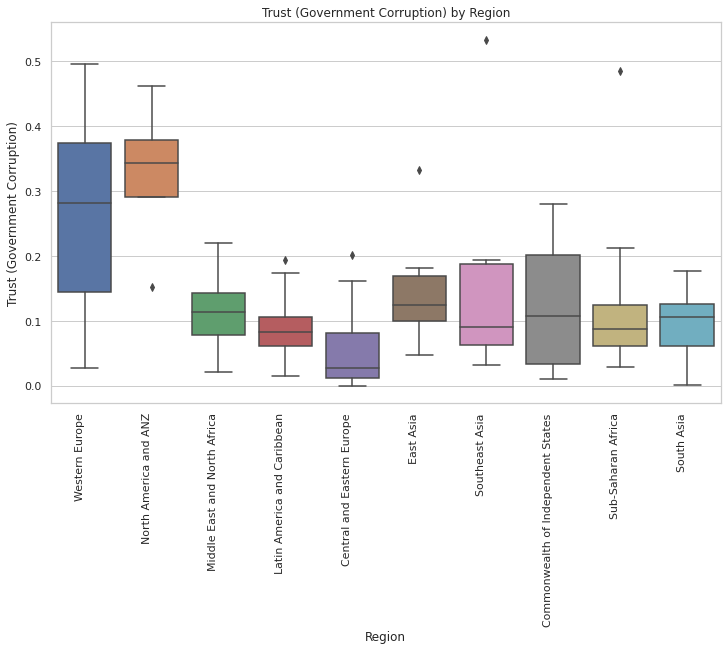

In [39]:
data_2020_clean = data_2020.dropna(subset=['Trust (Government Corruption)', 'Region'])

# 将数据转换为Pandas DataFrame以便绘图
data_2020_pandas = data_2020_clean.toPandas()

# 设置绘图风格
sns.set(style="whitegrid")

# 绘制箱型图
plt.figure(figsize=(12, 7))
sns.boxplot(x='Region', y='Trust (Government Corruption)', data=data_2020_pandas)

# 添加图表标题和轴标签
plt.title('Trust (Government Corruption) by Region')
plt.xlabel('Region')
plt.ylabel('Trust (Government Corruption)')

# 优化x轴标签的显示
plt.xticks(rotation=90, ha='right')

# 保存图表
#plt.savefig("/Users/zhoudaozhen/Desktop/722/iteration3/Figures/21.png", format='png')

# 显示图表
plt.show()

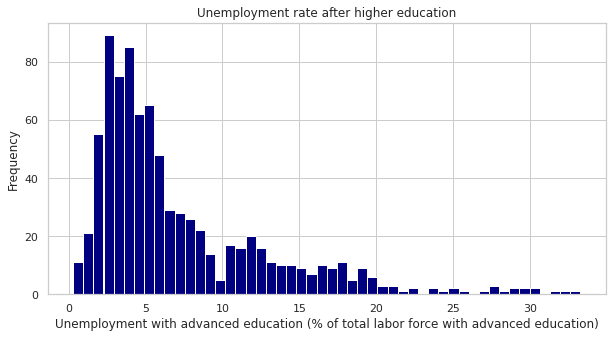

In [42]:
# 重命名列
dataatt = dataatt.withColumnRenamed("Unemployment with advanced education (% of total labor force with advanced education) [SL.UEM.ADVN.ZS]", "Unemployment_Advanced_Edu")

# 清除包含缺失值的行
data_clean = dataatt.dropna(subset=['Unemployment_Advanced_Edu'])

# 将处理后的数据转换为 Pandas DataFrame
data_clean_pd = data_clean.toPandas()

# 绘制二维直方图
plt.figure(figsize=(10, 5))
plt.hist(data_clean_pd['Unemployment_Advanced_Edu'], bins=50, color='navy')

# 添加标题和轴标签
plt.title('Unemployment rate after higher education')
plt.xlabel('Unemployment with advanced education (% of total labor force with advanced education)')
plt.ylabel('Frequency')

# 设置图形背景颜色为白色
plt.gca().set_facecolor('white')

# 显示网格
plt.grid(True)
#plt.savefig("/Users/zhoudaozhen/Desktop/722/iteration3/Figures/22.png", format='png')
# 显示图表
plt.show()

In [20]:
# 获取前四列的名称
string_cols = data_attribute.columns[:4]
# 获取其他列的名称
numeric_cols = data_attribute.columns[4:]

# 将前四列保留为字符串类型，其他列转换为数字类型
for col_name in numeric_cols:
    data_attribute = data_attribute.withColumn(col_name, col(col_name).cast("double"))

# 检查转换后的数据类型
data_attribute.printSchema()

root
 |-- Time: string (nullable = true)
 |-- Time_Code: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- Country_Code: string (nullable = true)
 |-- Access_to_clean_fuels_and_technologies_for_cooking: double (nullable = true)
 |-- Access_to_electricity: double (nullable = true)
 |-- Adjusted_savings:_carbon_dioxide_damage: double (nullable = true)
 |-- Adolescent_fertility_rate: double (nullable = true)
 |-- Agricultural_land: double (nullable = true)
 |-- Age_dependency_ratio: double (nullable = true)
 |-- Agriculture,_forestry,_and_fishing,_value_added: double (nullable = true)
 |-- Arable_land: double (nullable = true)
 |-- Claims_on_central_government,_etc_: double (nullable = true)
 |-- Commercial_service_exports: double (nullable = true)
 |-- Commercial_service_imports: double (nullable = true)
 |-- Computer,_communications_and_other_services: double (nullable = true)
 |-- Contributing_family_workers,_total: double (nullable = true)
 |-- Employment_to_populat

In [21]:
from pyspark.sql.types import DoubleType, IntegerType, FloatType, LongType, ShortType

In [ ]:
from pyspark.sql.types import DoubleType, IntegerType, FloatType, LongType, ShortType

# 将 DataFrame 转换为 Pandas DataFrame
data_attribute_pd = data_attribute.toPandas()

# 选择数据类型为数值的列
numeric_cols = data_attribute_pd.select_dtypes(include=['float64'])

# 设定每行显示的图形数
n_cols = 3
n_rows = (len(numeric_cols.columns) + n_cols - 1) // n_cols  # 确保有足够的行来展示所有图形

# 创建一个足够大的画布来容纳所有的直方图
plt.figure(figsize=(n_cols * 5, n_rows * 4))  # 宽度为5*n_cols, 高度为4*n_rows

for i, column in enumerate(numeric_cols.columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(data_attribute_pd[column], kde=True, color='skyblue')
    plt.title(f'Distribution of {column}')
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()


In [56]:
data_attribute

DataFrame[Time: string, Time_Code: string, Country: string, Country_Code: string, Access_to_clean_fuels_and_technologies_for_cooking: double, Access_to_electricity: double, Adjusted_savings:_carbon_dioxide_damage: double, Adolescent_fertility_rate: double, Agricultural_land: double, Age_dependency_ratio: double, Agriculture,_forestry,_and_fishing,_value_added: double, Arable_land: double, Claims_on_central_government,_etc_: double, Commercial_service_exports: double, Commercial_service_imports: double, Computer,_communications_and_other_services: double, Contributing_family_workers,_total: double, Employment_to_population_ratio,_ages_15-24,_total: double, Fertility_rate,_total: double, Fixed_broadband_subscriptions: double, Fixed_telephone_subscriptions: double, Forest_area: double, GDP: double, Imports_of_goods_and_services_1: double, Imports_of_goods_and_services_2: double, Imports_of_goods,_services_and_primary_income: double, Individuals_using_the_Internet: double, Inflation,_consu

In [ ]:
#combined_data = pd.concat([data_2013, data_2015, data_2016, data_2017, data_2018, 
                           data_2019, data_2020, data_2021, data_2022, data_2023], 
                          axis=0, ignore_index=True)

#print("Shape of the 2013 year dataset:", data_2013.shape)
#print("Shape of the combined dataset:", combined_data.shape)

In [49]:
data_attribute.show(2)

+----+---------+-----------+------------+--------------------------------------------------+---------------------+------------------------------------------------------------------------------------+-------------------------------------+--------------------------------------+------------------------------------------+-------------------------------------+----------------------------+---------------------------------------+----------------------------------------------+-------------------------------+-------------------------+-------------------------+------+-----------------+--------------------+-----------------------------------------------+-----------------------------------------------+-----------+----------------------------------------------+------------+------------+------------------------------------------------------------+----------------------------+------------------------------------------------------------------+------------------------------+-------------------------+--

In [22]:
from pyspark.sql.functions import col, regexp_replace
# 替换 'data_attribute' 中的 '..' 为 np.nan
data_attribute_pd = data_attribute.toPandas()
data_attribute_pd.replace('..', np.nan, inplace=True)
data_attribute = spark.createDataFrame(data_attribute_pd)

# 删除 'Country' 列中的 '*' 字符
combined_data = combined_data.withColumn('Country', regexp_replace(col('Country'), '\*', ''))

# 将 'Time' 列名改为 'Year'
data_attribute = data_attribute.withColumnRenamed('Time', 'Year')
combined_data = combined_data.withColumnRenamed('Time', 'Year')

# 将处理后的 DataFrame 转换为 Pandas DataFrame
data_attribute_pd = data_attribute.toPandas()
combined_data_pd = combined_data.toPandas()

In [23]:
# 找到数值类型的列
numeric_cols = [field.name for field in data_attribute.schema.fields if isinstance(field.dataType, (DoubleType, IntegerType, FloatType, LongType, ShortType))]

# 计算每列的均值
means = {col: data_attribute.select(mean(col)).first()[0] for col in numeric_cols}

# 用均值填充缺失值
data_filled = data_attribute.fillna(means)

# 显示处理后的数据
data_filled.show()

+----+---------+-------------------+------------+--------------------------------------------------+---------------------+---------------------------------------+-------------------------+-----------------+--------------------+-----------------------------------------------+-----------+----------------------------------+--------------------------+--------------------------+-------------------------------------------+----------------------------------+-------------------------------------------------+---------------------+-----------------------------+-----------------------------+-----------+-------------+-------------------------------+-------------------------------+---------------------------------------------+------------------------------+--------------------------+--------------------------------+-------------------+-----------------------------------+-------------------------------+-------------------+-------------------+------------------------+
|Year|Time_Code|            Coun

In [ ]:
#from sklearn.experimental import enable_iterative_imputer
#from sklearn.impute import KNNImputer, IterativeImputer

#numeric_df = data_attribute.select_dtypes(include=['int64', 'float64'])

# 创建KNN填充器实例
#knn_imputer = KNNImputer(n_neighbors=5)

# 应用填充器
#numeric_df_filled_knn = pd.DataFrame(knn_imputer.fit_transform(numeric_df), columns=numeric_df.columns)

# 检查填充后的结果
#print(numeric_df_filled_knn)

# 合并填充后的数值数据与原始非数值数据
#data_attribute.update(numeric_df_filled_knn)

# 查看完整的DataFrame结果
#print(data_attribute)

In [ ]:
country_name_mapping = {
    'Congo (Brazzaville)': 'Congo, Rep.',
    'Czech Republic': 'Czechia',
    'Egypt': 'Egypt, Arab Rep.',
    'Gambia': 'Gambia, The',
    'Hong Kong S.A.R. of China': 'Hong Kong SAR, China',
    'Iran': 'Iran, Islamic Rep.',
    'Kyrgyzstan': 'Kyrgyz Republic',
    'Laos': 'Lao PDR',
  #  'North Cyprus': '
   # 'Palestinian Territories': '
    'Russia': 'Russian Federation',
    'Slovakia': 'Slovak Republic',
    'South Korea': 'Korea, Rep.',
    #'Swaziland': '
    #'Taiwan Province of China': '
    'Turkey': 'Turkiye',
    'Venezuela': 'Venezuela, RB',
    'Vietnam': 'Viet Nam',
    'Yemen': 'Yemen, Rep.',
    'Zimbabwe': 'Zimbabwe'

}

In [24]:
# 国家名称映射字典
country_name_mapping = {
    'Congo (Brazzaville)': 'Congo, Rep.',
    'Czech Republic': 'Czechia',
    'Egypt': 'Egypt, Arab Rep.',
    'Gambia': 'Gambia, The',
    'Hong Kong S.A.R. of China': 'Hong Kong SAR, China',
    'Iran': 'Iran, Islamic Rep.',
    'Kyrgyzstan': 'Kyrgyz Republic',
    'Laos': 'Lao PDR',
    'Russia': 'Russian Federation',
    'Slovakia': 'Slovak Republic',
    'South Korea': 'Korea, Rep.',
    'Turkey': 'Turkiye',
    'Venezuela': 'Venezuela, RB',
    'Vietnam': 'Viet Nam',
    'Yemen': 'Yemen, Rep.',
    'Zimbabwe': 'Zimbabwe'
}

# 使用 when 和 otherwise 进行名称映射
def map_country_names(df, col_name, mapping_dict):
    mapping_expr = when(col(col_name) == list(mapping_dict.keys())[0], list(mapping_dict.values())[0])
    for k, v in list(mapping_dict.items())[1:]:
        mapping_expr = mapping_expr.when(col(col_name) == k, v)
    mapping_expr = mapping_expr.otherwise(col(col_name))
    return df.withColumn(col_name, mapping_expr)

# 对 data_attribute 和 combined_data 数据框进行国家名称映射
data_attribute = map_country_names(data_attribute, 'Country', country_name_mapping)
combined_data = map_country_names(combined_data, 'Country', country_name_mapping)

# 显示处理后的数据
data_attribute.show()
combined_data.show()

+----+---------+-------------------+------------+--------------------------------------------------+---------------------+---------------------------------------+-------------------------+-----------------+--------------------+-----------------------------------------------+-----------+----------------------------------+--------------------------+--------------------------+-------------------------------------------+----------------------------------+-------------------------------------------------+---------------------+-----------------------------+-----------------------------+-----------+-------------+-------------------------------+-------------------------------+---------------------------------------------+------------------------------+--------------------------+--------------------------------+-------------------+-----------------------------------+-------------------------------+-------------------+-------------------+------------------------+
|Year|Time_Code|            Coun

In [35]:
from pyspark.sql.functions import col, expr

# 选择数值类型的列
numeric_cols = [field.name for field in data_attribute.schema.fields if field.dataType in [DoubleType(), IntegerType(), FloatType(), LongType(), ShortType()]]

def outliers_iqr(df, col_name):
    Q1 = df.approxQuantile(col_name, [0.25], 0.0)[0]
    Q3 = df.approxQuantile(col_name, [0.75], 0.0)[0]
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_mask = (col(col_name) < lower_bound) | (col(col_name) > upper_bound)
    return outliers_mask

print("\nOutliers detected by IQR Method:")
for column in numeric_cols:
    mask = outliers_iqr(data_attribute, column)
    outlier_count = data_attribute.filter(mask).count()
    print(f"{column}: {outlier_count}")

# 显示处理后的数据
data_attribute.show()


Outliers detected by IQR Method:
Access_to_clean_fuels_and_technologies_for_cooking: 0
Access_to_electricity: 0
Adjusted_savings:_carbon_dioxide_damage: 0


Adolescent_fertility_rate: 53
Agricultural_land: 464
Age_dependency_ratio: 82
Agriculture,_forestry,_and_fishing,_value_added: 475
Arable_land: 177
Claims_on_central_government,_etc_: 0
Commercial_service_exports: 454
Commercial_service_imports: 451


ERROR:root:KeyboardInterrupt while sending command.
Traceback (most recent call last):
  File "/home/ubuntu/.local/lib/python3.10/site-packages/py4j/java_gateway.py", line 1038, in send_command
    response = connection.send_command(command)
  File "/home/ubuntu/.local/lib/python3.10/site-packages/py4j/clientserver.py", line 475, in send_command
    answer = smart_decode(self.stream.readline()[:-1])
  File "/usr/lib/python3.10/socket.py", line 705, in readinto
    return self._sock.recv_into(b)
KeyboardInterrupt


Computer,_communications_and_other_services: 0


KeyboardInterrupt: 

In [25]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, when, lit
from pyspark.sql.types import DoubleType, IntegerType, FloatType, LongType, ShortType



# 假设 data_attribute 已经被加载为 PySpark DataFrame
# 选择数值类型的列
numeric_cols = [field.name for field in data_attribute.schema.fields if field.dataType in [DoubleType(), IntegerType(), FloatType(), LongType(), ShortType()]]

def outliers_iqr(df, col_name):
    Q1 = df.approxQuantile(col_name, [0.25], 0.0)[0]
    Q3 = df.approxQuantile(col_name, [0.75], 0.0)[0]
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_mask = (col(col_name) < lower_bound) | (col(col_name) > upper_bound)
    return outliers_mask

def replace_with_nearest(df, col_name):
    # 标记异常值
    outliers_mask = outliers_iqr(df, col_name)
    non_outliers = df.filter(~outliers_mask).select(col_name).rdd.flatMap(lambda x: x).collect()
    non_outliers = sorted(non_outliers)  # 排序以便二分搜索

    def find_closest(value):
        # 使用二分搜索找到最近的非异常值
        import bisect
        pos = bisect.bisect_left(non_outliers, value)
        if pos == 0:
            return non_outliers[0]
        if pos == len(non_outliers):
            return non_outliers[-1]
        before = non_outliers[pos - 1]
        after = non_outliers[pos]
        if after - value < value - before:
            return after
        else:
            return before

    # 替换异常值
    replace_udf = spark.udf.register("replace_udf", find_closest, DoubleType())
    df = df.withColumn(col_name, when(outliers_mask, replace_udf(col(col_name))).otherwise(col(col_name)))
    return df

# 处理所有数值列的异常值
for column in numeric_cols:
    data_attribute = replace_with_nearest(data_attribute, column)

# 显示处理后的数据
data_attribute.show()

# 假设 data5 是另一个 PySpark DataFrame
# 更新数据
#data5 = data5.join(data_attribute, on='id', how='left')  # 假设存在共同列 'id'


24/05/15 23:25:54 WARN SimpleFunctionRegistry: The function replace_udf replaced a previously registered function.
24/05/15 23:25:55 WARN SimpleFunctionRegistry: The function replace_udf replaced a previously registered function.
24/05/15 23:25:57 WARN SimpleFunctionRegistry: The function replace_udf replaced a previously registered function.
24/05/15 23:25:58 WARN SimpleFunctionRegistry: The function replace_udf replaced a previously registered function.
24/05/15 23:25:59 WARN SimpleFunctionRegistry: The function replace_udf replaced a previously registered function.
24/05/15 23:26:00 WARN SimpleFunctionRegistry: The function replace_udf replaced a previously registered function.
24/05/15 23:26:02 WARN SimpleFunctionRegistry: The function replace_udf replaced a previously registered function.
24/05/15 23:26:03 WARN SimpleFunctionRegistry: The function replace_udf replaced a previously registered function.
24/05/15 23:26:04 WARN SimpleFunctionRegistry: The function replace_udf replaced

+----+---------+-------------------+------------+--------------------------------------------------+---------------------+---------------------------------------+-------------------------+-----------------+--------------------+-----------------------------------------------+-----------+----------------------------------+--------------------------+--------------------------+-------------------------------------------+----------------------------------+-------------------------------------------------+---------------------+-----------------------------+-----------------------------+-----------+-------------+-------------------------------+-------------------------------+---------------------------------------------+------------------------------+--------------------------+--------------------------------+-------------------+-----------------------------------+-------------------------------+-------------------+-------------------+------------------------+
|Year|Time_Code|            Coun

In [ ]:
data_2013['Year'] = 2013
data_2015['Year'] = 2015
data_2016['Year'] = 2016
data_2017['Year'] = 2017
data_2018['Year'] = 2018
data_2019['Year'] = 2019
data_2020['Year'] = 2020
data_2021['Year'] = 2021
data_2022['Year'] = 2022
data_2023['Year'] = 2023

In [26]:
data_attribute = data_attribute.withColumn(
    'COVID_Impact',
    when(col('Year').isin([2019, 2020, 2021]), 1).otherwise(0)
)

# 显示处理后的数据
data_attribute.show(2)

+----+---------+-----------+------------+--------------------------------------------------+---------------------+---------------------------------------+-------------------------+-----------------+--------------------+-----------------------------------------------+-----------+----------------------------------+--------------------------+--------------------------+-------------------------------------------+----------------------------------+-------------------------------------------------+---------------------+-----------------------------+-----------------------------+-----------+----------+-------------------------------+-------------------------------+---------------------------------------------+------------------------------+--------------------------+--------------------------------+-------------------+-----------------------------------+-------------------------------+-------------------+-------------------+------------------------+------------+
|Year|Time_Code|    Country|Co

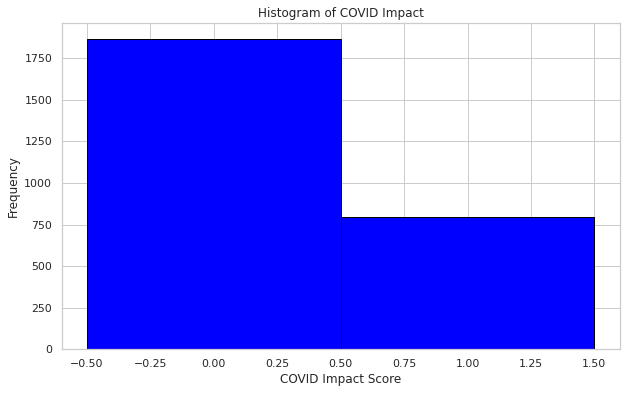

In [64]:
spark = SparkSession.builder.appName("COVIDImpact").getOrCreate()

# 假设 data_attribute 已经被加载为 PySpark DataFrame
# 使用 when 和 otherwise 添加新的列 COVID_Impact
data_attribute = data_attribute.withColumn(
    'COVID_Impact',
    when(col('Year').isin([2019, 2020, 2021]), 1).otherwise(0)
)

# 将 PySpark DataFrame 转换为 Pandas DataFrame
data_attribute_pd = data_attribute.toPandas()

# 使用 Matplotlib 绘制直方图
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(data_attribute_pd['COVID_Impact'], bins=[-0.5, 0.5, 1.5], color='blue', edgecolor='black')
plt.title('Histogram of COVID Impact')
plt.xlabel('COVID Impact Score')
plt.ylabel('Frequency')
#plt.savefig("/Users/zhoudaozhen/Desktop/722/iteration3/Figures/32.png", format='png')
plt.show()

In [27]:

# 执行合并操作
data3 = combined_data.join(data_attribute, on=['Year', 'Country'], how='left')

# 将合并后的数据帧转换为 Pandas DataFrame
data3_pd = data3.toPandas()

data3.show(2)

+----+-------+-------+---------------+-----------------------------+--------------+------------------------+------------------------+---------+------------+--------------------------------------------------+---------------------+---------------------------------------+-------------------------+-----------------+--------------------+-----------------------------------------------+-----------+----------------------------------+--------------------------+--------------------------+-------------------------------------------+----------------------------------+-------------------------------------------------+---------------------+-----------------------------+-----------------------------+-----------+----------+-------------------------------+-------------------------------+---------------------------------------------+------------------------------+--------------------------+--------------------------------+-------------------+-----------------------------------+--------------------------

In [ ]:
#data3['Happiness Ranking'] = data3['Happiness Ranking'].astype(int)

In [28]:
from pyspark.sql.functions import col, sum as _sum
# 创建 SparkSession

# 计算每列的缺失值数量
missing_values = data3.select([_sum(col(c).isNull().cast("int")).alias(c) for c in data3.columns])

# 将结果转换为 Pandas DataFrame 以便于打印
missing_values_pd = missing_values.toPandas().transpose()
missing_values_pd.columns = ['missing_count']
missing_values_pd['column'] = missing_values_pd.index

# 循环遍历每列的缺失值数量并打印
for row in missing_values_pd.itertuples():
    print(f"{row.column}: {row.missing_count}")

Year: 0
Country: 0
Freedom: 1
Happiness Score: 0
Trust (Government Corruption): 2
Happiness Rank: 0
Economy (GDP per Capita): 0
Health (Life Expectancy): 3
Time_Code: 77
Country_Code: 77
Access_to_clean_fuels_and_technologies_for_cooking: 77
Access_to_electricity: 77
Adjusted_savings:_carbon_dioxide_damage: 77
Adolescent_fertility_rate: 77
Agricultural_land: 77
Age_dependency_ratio: 77
Agriculture,_forestry,_and_fishing,_value_added: 77
Arable_land: 77
Claims_on_central_government,_etc_: 77
Commercial_service_exports: 77
Commercial_service_imports: 77
Computer,_communications_and_other_services: 77
Contributing_family_workers,_total: 77
Employment_to_population_ratio,_ages_15-24,_total: 77
Fertility_rate,_total: 77
Fixed_broadband_subscriptions: 77
Fixed_telephone_subscriptions: 77
Forest_area: 77
GDP: 77
Imports_of_goods_and_services_1: 77
Imports_of_goods_and_services_2: 77
Imports_of_goods,_services_and_primary_income: 77
Individuals_using_the_Internet: 77
Inflation,_consumer_prices

In [29]:
from pyspark.ml.feature import Imputer


# 查找并打印包含缺失值的行
data3.select([col(c).isNull().alias(c) for c in data3.columns]).filter(" OR ".join([f"`{c}`" for c in data3.columns])).show()

# 查找数值类型的列
numeric_cols = [field.name for field in data3.schema.fields if isinstance(field.dataType, (IntegerType, FloatType, DoubleType))]

# 使用 Imputer 类填补数值列的缺失值
imputer = Imputer(inputCols=numeric_cols, outputCols=numeric_cols)
model = imputer.fit(data3)
data3_imputed = model.transform(data3)

# 检查填补后的数据
#data3_imputed.show()

# 保存处理后的 DataFrame 到变量 data3
data3 = data3_imputed

+-----+-------+-------+---------------+-----------------------------+--------------+------------------------+------------------------+---------+------------+--------------------------------------------------+---------------------+---------------------------------------+-------------------------+-----------------+--------------------+-----------------------------------------------+-----------+----------------------------------+--------------------------+--------------------------+-------------------------------------------+----------------------------------+-------------------------------------------------+---------------------+-----------------------------+-----------------------------+-----------+-----+-------------------------------+-------------------------------+---------------------------------------------+------------------------------+--------------------------+--------------------------------+-------------------+-----------------------------------+------------------------------

In [ ]:
data3

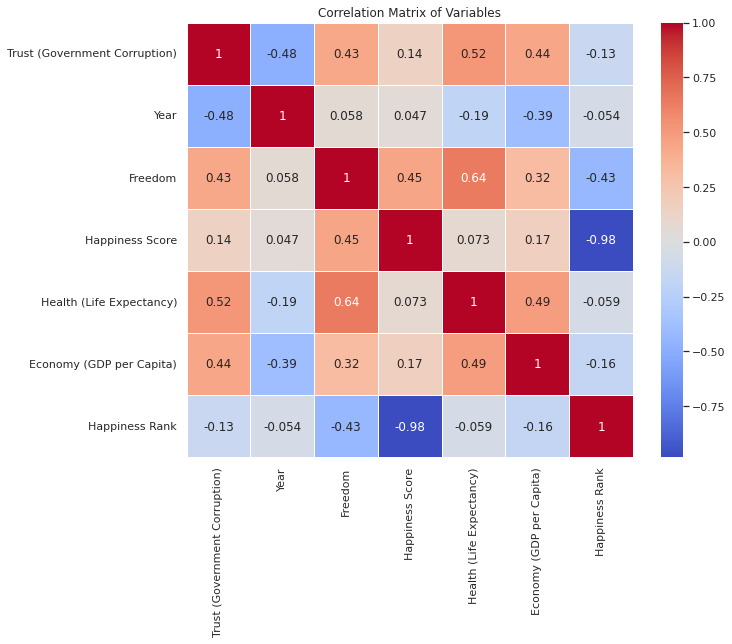

In [75]:
#2. 相关矩阵（Correlation Matrix）

# 将数据转换为Pandas DataFrame
combined_data_pd = combined_data.toPandas()

# 生成相关矩阵图
plt.figure(figsize=(10, 8))
correlation_matrix = combined_data_pd.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix of Variables')
#plt.savefig("/Users/zhoudaozhen/Desktop/722/iteration3/Figures/16.png", format='png')
plt.show()

24/05/15 10:49:17 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
24/05/15 10:49:17 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.ForeignLinkerBLAS


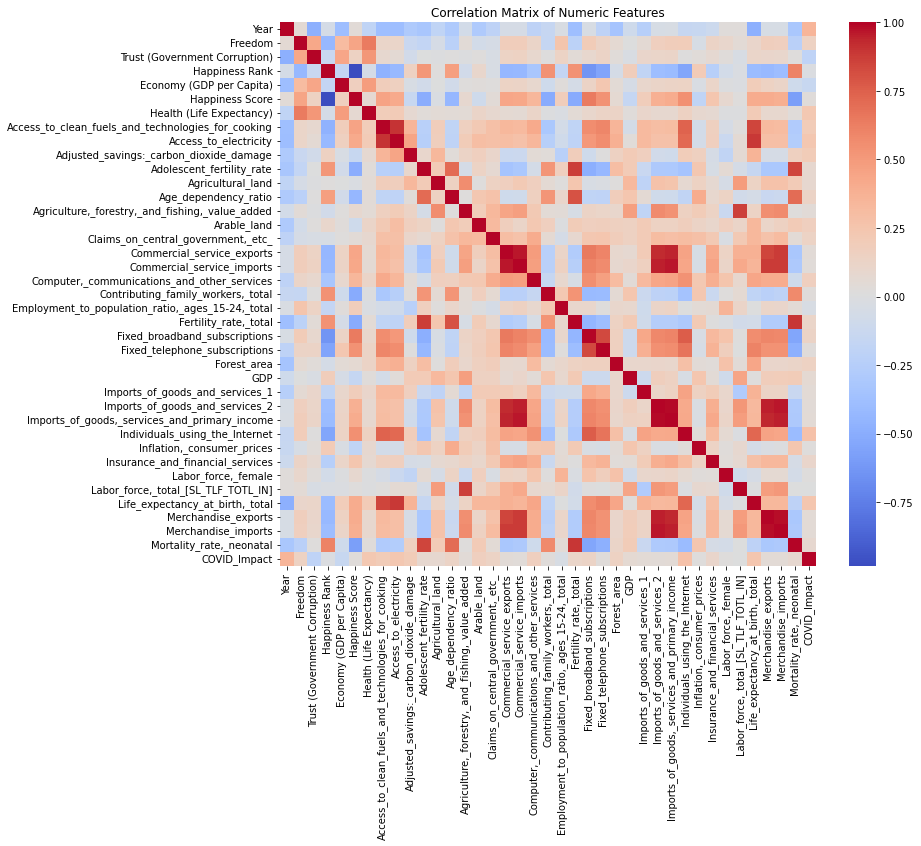

In [68]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.stat import Correlation
from pyspark.sql.functions import col

# 选择数值型数据列
numeric_cols = [field.name for field in data3.schema.fields if isinstance(field.dataType, (IntegerType, FloatType, DoubleType))]

# 将数值型数据列转换为特征向量
assembler = VectorAssembler(inputCols=numeric_cols, outputCol="features")
vector_data = assembler.transform(data3).select("features")

# 计算相关矩阵
correlation_matrix = Correlation.corr(vector_data, "features").head()[0]

# 将相关矩阵转换为 NumPy 数组
correlation_matrix_np = correlation_matrix.toArray()

# 绘制热图
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_np, annot=False, fmt=".2f", cmap='coolwarm', xticklabels=numeric_cols, yticklabels=numeric_cols)
plt.title("Correlation Matrix of Numeric Features")
#plt.savefig("/Users/zhoudaozhen/Desktop/722/iteration3/Figures/39.png", format='png')
plt.show()

In [30]:
from pyspark.ml.feature import VectorAssembler, ChiSqSelector
from pyspark.sql.functions import col
from pyspark.ml.linalg import Vectors
from pyspark.sql import Row

# 选择数值型数据列
numeric_cols = [field.name for field in data3.schema.fields if isinstance(field.dataType, (IntegerType, FloatType, DoubleType)) and field.name != 'Happiness Score']

# 创建一个特征向量
assembler = VectorAssembler(inputCols=numeric_cols, outputCol="features")
data_with_features = assembler.transform(data3)

# 使用 ChiSqSelector 选择最重要的特征 (示例选择 15 个特征)
selector = ChiSqSelector(numTopFeatures=15, featuresCol="features", outputCol="selectedFeatures", labelCol="Happiness Score")
result = selector.fit(data_with_features).transform(data_with_features)

# 获取选择的特征索引
selected_indices = selector.fit(data_with_features).selectedFeatures

# 显示选择的特征名称
selected_features = [numeric_cols[i] for i in selected_indices]
print("Selected features based on ChiSqSelector:", selected_features)

# 将选择的特征保存到新的 DataFrame
data_selected = result.select(['Happiness Score'] + selected_features+['Year']+['COVID_Impact'])
data_selected.show()


Selected features based on ChiSqSelector: ['Freedom', 'Trust (Government Corruption)', 'Happiness Rank', 'Economy (GDP per Capita)', 'Health (Life Expectancy)', 'Adjusted_savings:_carbon_dioxide_damage', 'Adolescent_fertility_rate', 'Agricultural_land', 'Arable_land', 'Fertility_rate,_total', 'Forest_area', 'Imports_of_goods_and_services_1', 'Individuals_using_the_Internet', 'Life_expectancy_at_birth,_total', 'Mortality_rate,_neonatal']


+---------------+-------+-----------------------------+--------------+------------------------+------------------------+---------------------------------------+-------------------------+-----------------+-----------+---------------------+-----------+-------------------------------+------------------------------+-------------------------------+------------------------+
|Happiness Score|Freedom|Trust (Government Corruption)|Happiness Rank|Economy (GDP per Capita)|Health (Life Expectancy)|Adjusted_savings:_carbon_dioxide_damage|Adolescent_fertility_rate|Agricultural_land|Arable_land|Fertility_rate,_total|Forest_area|Imports_of_goods_and_services_1|Individuals_using_the_Internet|Life_expectancy_at_birth,_total|Mortality_rate,_neonatal|
+---------------+-------+-----------------------------+--------------+------------------------+------------------------+---------------------------------------+-------------------------+-----------------+-----------+---------------------+-----------+--------

In [31]:
from pyspark.sql.functions import monotonically_increasing_id
non_numeric_cols = [field.name for field in data3.schema.fields if not isinstance(field.dataType, (IntegerType, FloatType, DoubleType))]

# 从 data3 中选择非数值数据
data_non_numeric = data3.select(*non_numeric_cols)

data_selected = data_selected.withColumn("index", monotonically_increasing_id())
data_non_numeric = data_non_numeric.withColumn("index", monotonically_increasing_id())

# 合并两个 DataFrame
data_combined = data_selected.join(data_non_numeric, on="index").drop("index")

# 显示合并后的数据
data_combined.show()
data5 = data_combined

+---------------+-------+-----------------------------+--------------+------------------------+------------------------+---------------------------------------+-------------------------+------------------+------------------+---------------------+----------------+-------------------------------+------------------------------+-------------------------------+------------------------+--------------------+---------+------------+
|Happiness Score|Freedom|Trust (Government Corruption)|Happiness Rank|Economy (GDP per Capita)|Health (Life Expectancy)|Adjusted_savings:_carbon_dioxide_damage|Adolescent_fertility_rate| Agricultural_land|       Arable_land|Fertility_rate,_total|     Forest_area|Imports_of_goods_and_services_1|Individuals_using_the_Internet|Life_expectancy_at_birth,_total|Mortality_rate,_neonatal|             Country|Time_Code|Country_Code|
+---------------+-------+-----------------------------+--------------+------------------------+------------------------+------------------------

In [ ]:
下面这行也不要管它

In [ ]:
# Define a dictionary with old column names as keys and new column names as values
new_column_names = {
    'Fixed broadband subscriptions': 'Fixed_Broadband',
    'Fixed telephone subscriptions': 'Fixed_Telephone',
    'Economy (GDP per Capita)': 'GDP_per_Capita',
    'Employment to population ratio, ages 15-24, total': 'Youth_Emp_Ratio',
    'Health (Life Expectancy)': 'Health_Life_Exp',
    'Adjusted savings: carbon dioxide damage': 'CO2_Damage',
    'Freedom': 'Freedom',
    'Individuals using the Internet': 'Internet_Users',
    'Life expectancy at birth, total': 'Life_Expectancy',
    'Labor force, female': 'Female_Labor_Force',
    'Trust (Government Corruption)': 'Gov_Trust',
    'Mortality rate, neonatal': 'Neonatal_Mortality',
    'Access to electricity': 'Electricity_Access',
    'Agriculture, forestry, and fishing, value added': 'Agri_Value_Added',
    'Computer, communications and other services': 'Tech_Services',
    'Merchandise exports': 'Merch_Exports',
    'GDP': 'GDP_Total',
    'Insurance and financial services': 'Insur_Fin_Services',
    'Adolescent fertility rate': 'Adol_Fertility',
    'Labor force, total [SL.TLF.TOTL.IN]': 'Total_Labor_Force',
    'Happiness Score': 'Happiness Score',
    'Country': 'Country',
    'Year': 'Year',
    'Time Code': 'Time_Code',
    'Country Code': 'Country_Code'
}

data5.rename(columns=new_column_names, inplace=True)
data5

In [39]:
data5.show()

+---------------+------------------+-----------------------------+------------------+------------------------+------------------------+---------------------------------------+-------------------------+------------------+-------------------+---------------------+-------------------+-------------------------------+------------------------------+-------------------------------+------------------------+--------------------+---------+------------+
|Happiness Score|           Freedom|Trust (Government Corruption)|    Happiness Rank|Economy (GDP per Capita)|Health (Life Expectancy)|Adjusted_savings:_carbon_dioxide_damage|Adolescent_fertility_rate| Agricultural_land|        Arable_land|Fertility_rate,_total|        Forest_area|Imports_of_goods_and_services_1|Individuals_using_the_Internet|Life_expectancy_at_birth,_total|Mortality_rate,_neonatal|             Country|Time_Code|Country_Code|
+---------------+------------------+-----------------------------+------------------+---------------------

In [40]:
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.sql.functions import col, log1p, pow
from pyspark.ml import Pipeline
from pyspark.sql import SparkSession


data5 = data5.drop("scaled_features", "features")

# 选择数值型数据列，排除目标列 'Happiness Score'
numeric_cols = [field.name for field in data5.schema.fields if isinstance(field.dataType, (IntegerType, FloatType, DoubleType))]
numeric_cols.remove('Happiness Score')
numeric_cols.remove('Happiness Rank')
# 应用对数变换
#for col_name in numeric_cols:
#    data5 = data5.withColumn(col_name, log1p(col(col_name)))

# 应用平方根变换
#for col_name in numeric_cols:
#    data5 = data5.withColumn(col_name, pow(col(col_name), 0.5))

# 组合数值列为一个向量
vector_col = "features1"
assembler = VectorAssembler(inputCols=numeric_cols, outputCol=vector_col)
data_vector = assembler.transform(data5)

# 标准化数据
scaler = StandardScaler(inputCol=vector_col, outputCol="features", withMean=True, withStd=True)
pipeline = Pipeline(stages=[assembler, scaler])
data_scaled = pipeline.fit(data5).transform(data5)

# 显示标准化后的数据
data_scaled.select("features").show(truncate=False)



+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|features                                                                                                                                                                                                                                                                                |
+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|[0.5872455411105945,2.1911875279454915,2.4764104383870356,1.7629563703977431,-0.18431918078860107,1.0747035345832414,0.2835138749043019,0.343471245618

In [41]:
data_final = data_scaled.select("features", "Happiness Score")

In [42]:
data_final.show()

+--------------------+---------------+
|            features|Happiness Score|
+--------------------+---------------+
|[0.54707639262787...|          4.867|
|[1.12182915677316...|          7.039|
|[0.55808734909098...|          5.791|
|[0.51378838614746...|          4.826|
|[0.65533462925610...|           3.77|
|[0.57634581629622...|          5.464|
|[0.87022724939576...|          5.809|
|[0.44603384836180...|          4.156|
|[1.44875085088117...|          7.144|
|[1.12483882858051...|          6.322|
|[0.92234013025446...|          5.426|
|[1.16960924310249...|          7.088|
|[0.96081430778252...|          4.443|
|[1.04554350988938...|           4.69|
|[0.08098576440483...|          3.706|
|[1.09459918336522...|          3.528|
|[0.76989591479710...|          4.114|
|[1.14880326796738...|          7.143|
|[0.29351255276671...|          5.661|
|[1.54126058825539...|           7.48|
+--------------------+---------------+
only showing top 20 rows



In [ ]:
data5_new = data5
#, 'Total_Labor_Force', 'Agri_Value_Added'

# 选择数据类型为数值的列
numeric_cols = data5_new.select_dtypes(include=['int64', 'float64'])
# 设定每行显示的图形数
n_cols = 4
n_rows = (len(numeric_cols.columns) + n_cols - 1) // n_cols  # 确保有足够的行来展示所有图形

# 创建一个足够大的画布来容纳所有的直方图
plt.figure(figsize=(n_cols * 5, n_rows * 4))  # 宽度为5*n_cols, 高度为4*n_rows

for i, column in enumerate(numeric_cols.columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(data5_new[column], kde=True, color='skyblue')
    plt.title(f'Distribution of {column}')
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.savefig("/Users/zhoudaozhen/Desktop/722/iteration3/Figures/44.png", format='png')
plt.show()

In [91]:
from pyspark.ml.feature import VectorAssembler
#这里是第八章的修改
#data5['COVID_Impact'] = data5['Year'].apply(lambda x: 1 if x in [2020, 2021] else 0)
#covid_impact_dummies = pd.get_dummies(data5['COVID_Impact'], prefix='COVID_Impact')
#data5 = pd.concat([data5, covid_impact_dummies], axis=1)
#data5 = data5.drop('COVID_Impact', axis=1)

#from sklearn.preprocessing import RobustScaler
#scaler = RobustScaler()
#data_transformed = scaler.fit_transform(numeric_data)
#numeric_data.update(data_transformed)
#numeric_data = data5.select_dtypes(include=[np.number]) 


IllegalArgumentException: Output column features already exists.

In [74]:
data6=data5
data5=data_final 

In [78]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.sql import SparkSession
import warnings

# 创建SparkSession
spark = SparkSession.builder.appName("LassoRegression").getOrCreate()

# 打印数据模式
#data_final.printSchema()

# 查看数据内容
#data_final.show(truncate=False)

# 定义Lasso回归模型
lr = LinearRegression(featuresCol='scaled_features', labelCol='Happiness Score', elasticNetParam=1.0)

# 构建参数网格
paramGrid = ParamGridBuilder() \
    .addGrid(lr.regParam, [1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100, 1000]) \
    .build()

# 定义评估器
evaluator = RegressionEvaluator(predictionCol="prediction", labelCol="Happiness Score", metricName="rmse")

# 构建交叉验证器
cv = CrossValidator(estimator=lr, estimatorParamMaps=paramGrid, evaluator=evaluator, numFolds=5)

# 训练模型
cvModel = cv.fit(data_final)

# 获取最佳模型和参数
bestModel = cvModel.bestModel
bestRegParam = bestModel._java_obj.getRegParam()
bestRmse = evaluator.evaluate(bestModel.transform(data_final))

print(f"Best alpha (regParam): {bestRegParam}")
print(f"Best RMSE: {bestRmse}")
# 定义Lasso回归模型，使用最佳参数 0.001
model= LinearRegression(featuresCol='features', labelCol='Happiness Score', elasticNetParam=1.0, regParam=0.001)


Best alpha (regParam): 0.001
Best RMSE: 0.44029080186987485


In [46]:
from pyspark.sql import SparkSession
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import VectorAssembler
import matplotlib.pyplot as plt




# 切分数据集为特征矩阵和目标变量
X = data_final.select("features")

# 计算 WCSS
wcss = []
for i in range(2, 5):
    kmeans = KMeans(k=i, initSteps=2, maxIter=300, seed=0)
    model = kmeans.fit(X)
    wcss.append(model.summary.trainingCost)

# 绘制肘部法图表
plt.figure(figsize=(10, 8))
plt.plot(range(2, 5), wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
#plt.savefig("/Users/zhoudaozhen/Desktop/722/iteration3/Figures/46.png", format='png')
plt.show()


root
 |-- features: vector (nullable = true)
 |-- Happiness Score: double (nullable = true)



+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------------+
|features                                                                                                                                                                                                                                                                                                    |Happiness Score|
+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------------+
|[1.7629563703977498,2.1911875279454884,0.5

IllegalArgumentException: Output column features already exists.

In [56]:
model= LinearRegression(featuresCol='features', labelCol='Happiness Score', elasticNetParam=1.0, regParam=0.001)

In [58]:
from pyspark.ml.clustering import KMeans
kmeans = KMeans(k=3, maxIter=300, initMode="k-means||", seed=0)

+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----------+
|features                                                                                                                                                                                                                                                                                |prediction|
+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----------+
|[0.5872455411105945,2.1911875279454915,2.4764104383870356,1.7629563703977431,-0.18431918078860107,1.0747035345832414,

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


# 使用PolynomialFeatures仅对训练数据进行转换
interaction = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
features = X_train.columns
X_train_interactions = interaction.fit_transform(X_train)
interaction_features = interaction.get_feature_names_out(features)
X_train_interactions_df = pd.DataFrame(X_train_interactions, columns=interaction_features)

model3 = LinearRegression()




In [60]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler, PolynomialExpansion
from pyspark.ml.regression import LinearRegression
from pyspark.ml.linalg import Vectors
from pyspark.ml import Pipeline
import matplotlib.pyplot as plt


# 使用 PolynomialExpansion 进行多项式特征扩展
poly_expansion = PolynomialExpansion(degree=2, inputCol="features", outputCol="polyFeatures")

# 创建线性回归模型
lr = LinearRegression(featuresCol="polyFeatures", labelCol="Happiness Score")

# 创建Pipeline
linearmodel = Pipeline(stages=[ poly_expansion, lr])

# 拆分数据集
train_data, test_data = data_final.randomSplit([0.8, 0.2], seed=42)





In [61]:
train_data, test_data = data_final.randomSplit([0.8, 0.2], seed=42)

In [62]:
train_data.show()

+--------------------+---------------+
|            features|Happiness Score|
+--------------------+---------------+
|[-5.0594950385972...|    2.566900015|
|[-5.0594950385972...|          2.404|
|[-5.0594950385972...|          1.859|
|[-5.0594950385972...|          3.795|
|[-5.0594950385972...|    3.795000076|
|[-5.0594950385972...|          4.677|
|[-4.2474914835117...|          2.853|
|[-4.1343560686048...|          3.462|
|[-4.0663636359445...|    4.138999939|
|[-4.0339058015134...|          4.139|
|[-3.7553285313433...|          3.597|
|[-3.6514901628173...|    3.602999926|
|[-3.3854275383092...|          2.905|
|[-3.1230627892278...|          5.033|
|[-3.0960968296298...|    2.904999971|
|[-3.0074556701463...|    2.816600084|
|[-3.0015447572975...|           4.49|
|[-2.9865040420084...|          5.287|
|[-2.8425565643692...|          4.857|
|[-2.8424178033678...|          5.295|
+--------------------+---------------+
only showing top 20 rows



In [63]:
from pyspark.ml.evaluation import RegressionEvaluator
# 定义Lasso回归模型，使用最佳参数 0.001
model = LinearRegression(featuresCol='features', labelCol='Happiness Score', elasticNetParam=1.0, regParam=0.001)
# 训练模型
fit = model.fit(train_data)

In [64]:
# 切分数据集为特征矩阵和目标变量
X = data_final.select("features")
fit2 = kmeans.fit(X)


In [65]:
# 训练模型
fit3 = linearmodel.fit(train_data)



24/05/16 00:24:46 WARN Instrumentation: [b3276847] regParam is zero, which might cause numerical instability and overfitting.


In [66]:
# 预测
predictions = fit.transform(test_data)

# 获取模型评估指标
training_summary = fit.summary
print(f"Training RMSE: {training_summary.rootMeanSquaredError}")
print(f"Training R2: {training_summary.r2}")

# 测试数据的评估指标
evaluator = RegressionEvaluator(predictionCol="prediction", labelCol="Happiness Score", metricName="rmse")
test_rmse = evaluator.evaluate(predictions)
test_r2 = evaluator.evaluate(predictions, {evaluator.metricName: "r2"})
print(f"Test RMSE: {test_rmse}")
print(f"Test R2: {test_r2}")

Training RMSE: 0.7038406405822916
Training R2: 0.6071266539087787


Test RMSE: 0.6638703874578744
Test R2: 0.652649121479234


In [67]:
# 获取聚类结果
transformed = fit2.transform(X)
# 获取 WCSS（簇内误差平方和）
wcss = fit2.summary.trainingCost
print(f"WCSS for k=3: {wcss}")

WCSS for k=3: 9423.77428191634


In [69]:
# 预测
predictions = fit3.transform(test_data)
# 获取模型评估指标
training_summary = fit3.stages[-1].summary
print(f"RMSE: {training_summary.rootMeanSquaredError}")
print(f"R2: {training_summary.r2}")

RMSE: 0.5295299492332302
R2: 0.777625521803949


In [71]:
# 获取模型系数和截距
coefficients = fit.coefficients
intercept = fit.intercept

# 打印系数和截距
print("Coefficients:", coefficients)
print("Intercept:", intercept)


Coefficients: [0.440540081086125,0.05367201696385378,0.035798342489063904,-0.24049100694399658,-0.21090730721624404,-0.01713849679540219,0.20217877100757653,-0.18516466922936803,-0.09902821599272482,-0.08059914564808619,-0.019511320589500884,0.20231589041597886,0.5789780620660723,-0.3799394595875337]
Intercept: 5.433239615849187


In [75]:
# 预测聚类
predictions = fit2.transform(data_final)

# 将聚类结果添加到未标准化的原始数据集中
numeric_data = predictions.select("prediction", "Happiness Score")

# 计算每个聚类的均值
cluster_means = numeric_data.groupBy("prediction").agg(mean("Happiness Score").alias("Mean_Happiness_Score"))

# 显示每个聚类的均值
cluster_means.show()



+----------+--------------------+
|prediction|Mean_Happiness_Score|
+----------+--------------------+
|         1|   6.077205896723078|
|         2|   5.563747252747251|
|         0|   5.103685713634137|
+----------+--------------------+



In [ ]:
predictions = fit2.transform(data_scaled)
# 获取数值型列
numeric_cols = [field.name for field in data_scaled.schema.fields if isinstance(field.dataType, (IntegerType, FloatType, DoubleType, LongType))]

# 将聚类结果添加到原始数据集中
numeric_data = predictions.select(["prediction"] + numeric_cols)

# 计算每个聚类的均值
cluster_means = numeric_data.groupBy("prediction").agg(
    *[mean(col).alias(f"mean_{col}") for col in numeric_cols if col != "prediction"]
)

# 获取聚类均值数据
cluster_means_df = cluster_means.toPandas()

cluster_means_df

In [ ]:
from pyspark.ml.feature import PolynomialExpansion
from pyspark.ml.regression import LinearRegression
from pyspark.ml import Pipeline
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
import statsmodels.api as sm
import numpy as np


# 训练模型
fit3 = pipeline.fit(train_data)

# 从模型中提取系数
model_stage = fit3.stages[-1]  # 获取线性回归模型
coefficients = model_stage.coefficients
intercept = model_stage.intercept

# 提取特征名称
poly_expansion_model = fit3.stages[0]
poly_features = poly_expansion_model.transform(train_data).schema['polyFeatures'].metadata["ml_attr"]["attrs"]["numeric"]

# 将训练数据转换为 NumPy 数组进行 statsmodels 回归分析
train_data_np = np.array(train_data.select("features").collect())
train_labels_np = np.array(train_data.select("Happiness Score").collect())

# 使用 PolynomialFeatures 创建交互项
interaction = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_interactions = interaction.fit_transform(train_data_np)
features = interaction.get_feature_names_out()

# 转换为 NumPy 数组并添加常数项
X_train_interactions_sm = sm.add_constant(X_train_interactions)

# 目标变量
y_train = train_labels_np

# 拟合 statsmodels 回归模型
model_sm = sm.OLS(y_train, X_train_interactions_sm).fit()

# 获取系数和 p 值
coefficients_sm = model_sm.params
p_values_sm = model_sm.pvalues

# 输出包含 "COVID_Impact" 的系数和 p 值
for feature, coef, p_value in zip(features, coefficients_sm, p_values_sm):
    if "COVID_Impact" in feature:
        print(f"Feature: {feature}, Coefficient: {coef}, P-value: {p_value}")


In [ ]:
# 重置索引，确保数据对齐
X_train_interactions_df = X_train_interactions_df.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

# 现在重新添加常数项和拟合模型
X_train_interactions_sm = sm.add_constant(X_train_interactions_df)
model_sm = sm.OLS(y_train, X_train_interactions_sm).fit()

# 创建一个 DataFrame 来存储系数、p 值
results_df = pd.DataFrame({
    'Coefficients': model_sm.params,
    'P-values': model_sm.pvalues
})
results_df = results_df.sort_values(by='P-values', ascending=True)
# 过滤出包含 "COVID_Impact" 的系数
covid_impact_df = results_df[results_df.index.str.contains('COVID_Impact')]
covid_impact_df


In [ ]:
# 预测
predictions = fit3.transform(test_data)
# 获取模型评估指标
training_summary = fit3.stages[-1].summary
print(f"RMSE: {training_summary.rootMeanSquaredError}")
print(f"R2: {training_summary.r2}")

In [ ]:
predictions = fit.transform(test_data)
predictions.select("Happiness Score", "prediction").show()

# 将预测值和实际值转换为 NumPy 数组
y_test = np.array(predictions.select("Happiness Score").collect()).flatten()
y_pred = np.array(predictions.select("prediction").collect()).flatten()

# 绘制预测值与实际值的对比图
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.75, color='b')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.show()




In [ ]:
# 获取模型系数和特征名称
coefficients = fit.coefficients
intercept = fit.intercept

# 手动设置特征名称
feature_names = numeric_cols

# 创建系数字典
coef_dict = {name: coef for name, coef in zip(feature_names, coefficients)}

# 绘制各特征系数的影响力图
plt.figure(figsize=(10, 8))
plt.barh(list(coef_dict.keys()), list(coef_dict.values()))
plt.xlabel('Coefficient Value')
plt.title('Feature Coefficients')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)
plt.show()

In [ ]:
# 收集数据到本地
data_local = data5.select("Happiness Score", *numeric_cols).collect()

# 将数据转换为二维列表
data_list = [[row["Happiness Score"]] + [row[col] for col in numeric_cols] for row in data_local]

# 使用matplotlib和seaborn绘图
# 设置画布大小
plt.figure(figsize=(20, 15))

# 遍历特征列表，为每个特征绘图
for i, feature in enumerate(numeric_cols, 1):
    plt.subplot((len(numeric_cols) + 3) // 4, 4, i)  # 确保足够的子图空间
    sns.scatterplot(x=[row[0] for row in data_list], y=[row[i] for row in data_list])
    plt.title(f'{feature}')
    plt.ylabel('')
    plt.xlabel('Happiness Score')

# 调整子图间距
plt.tight_layout()
#plt.savefig("/Users/zhoudaozhen/Desktop/722/iteration3/Figures/60.png", format='png')
plt.show()

In [ ]:
data5.columns 

In [ ]:
from pyspark.ml.feature import PCA


# PCA 降维
pca = PCA(k=2, inputCol="features", outputCol="pcaFeatures")
pca_model = pca.fit(data_scaled)
data_pca = pca_model.transform(data_scaled)

# 聚类
kmeans = KMeans(k=3, seed=1, featuresCol="features", predictionCol="prediction")
kmeans_model = kmeans.fit(data_pca)
data_clustered = kmeans_model.transform(data_pca)

# 收集数据到本地
data_local = data_clustered.select("pcaFeatures", "prediction").collect()

# 提取 PCA 结果和聚类标签
pca_result = [row["pcaFeatures"] for row in data_local]
clusters = [row["prediction"] for row in data_local]

# 转换为 numpy 数组
pca_result_np = np.array([list(vec) for vec in pca_result])
clusters_np = np.array(clusters)

# 可视化
plt.figure(figsize=(10, 8))
sns.scatterplot(x=pca_result_np[:, 0], y=pca_result_np[:, 1], hue=clusters_np, palette='viridis', alpha=0.7)
plt.title('Clusters visualized with PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [ ]:
# 计算每个簇的大小
cluster_sizes = data_clustered.groupBy("prediction").count().orderBy("prediction").collect()

# 提取簇标签和簇大小
labels = [row["prediction"] for row in cluster_sizes]
sizes = [row["count"] for row in cluster_sizes]

# 定义颜色数组，数量应与簇的数量一致
colors = plt.cm.tab20.colors[:len(sizes)]

# 绘制饼图
plt.figure(figsize=(8, 8))  # 设置图形的大小
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Cluster Size Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
#plt.savefig("/Users/zhoudaozhen/Desktop/722/iteration3/Figures/61.png", format='png')
# 显示图形
plt.show()

In [ ]:
# 选择簇和 Happiness Score 列
numeric_data = data_clustered.select("prediction", "Happiness Score")

# 将 Spark DataFrame 转换为 Pandas DataFrame
numeric_data_pd = numeric_data.toPandas()

# 确保 Seaborn 的样式
sns.set(style="whitegrid")

# 创建一个箱型图，表示不同簇的 Happiness Score
plt.figure(figsize=(10, 6))  # 设置图形的大小
sns.boxplot(x='prediction', y='Happiness Score', data=numeric_data_pd)

plt.title('Happiness Score Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Happiness Score')
#plt.savefig("/Users/zhoudaozhen/Desktop/722/iteration3/Figures/62.png", format='png')
# 显示图形
plt.show()


In [ ]:
# 预测值与实际值的对比图

y_pred = model3.predict(X_test_interactions_df)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.75, color='b')  # 预测值和实际值的散点图
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)  # 添加一条完美预测的对角线
plt.show()

# 各特征系数的影响力
coefficients.plot(kind='barh')
plt.title('Feature Coefficients')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)


In [ ]:
# 选择 COVID_Impact 和 Happiness Score 列并转换为本地列表
covid_impact_0 = data_final.filter(col("COVID_Impact") == 0).select("Happiness Score").rdd.flatMap(lambda x: x).collect()
covid_impact_1 = data_final.filter(col("COVID_Impact") == 1).select("Happiness Score").rdd.flatMap(lambda x: x).collect()

# 创建数据字典用于绘图
data_dict = {
    "COVID_Impact": ["0"] * len(covid_impact_0) + ["1"] * len(covid_impact_1),
    "Happiness_Score": covid_impact_0 + covid_impact_1
}

# 确保 Seaborn 的样式
sns.set(style="whitegrid")

# 创建一个箱型图，表示 COVID_Impact 为 0 和 1 时 Happiness Score 的分布
plt.figure(figsize=(8, 6))  # 设置图形的大小
sns.boxplot(x="COVID_Impact", y="Happiness_Score", data=data_dict)

plt.title('Distribution of Happiness Score by COVID Impact')
plt.xlabel('COVID Impact')
plt.ylabel('Happiness Score')
#plt.savefig("/Users/zhoudaozhen/Desktop/722/iteration3/Figures/63.png", format='png')
# 显示图形
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 设置Seaborn样式
sns.set(style="whitegrid")

# 准备数据：分别筛选COVID_Impact为0和1的数据，并计算每个Happiness Score的Life Expectancy平均值
mean_life_exp_covid_0 = numeric_data[numeric_data['COVID_Impact'] == 0].groupby('Happiness_Score')['Life_Expectancy'].select(mean('column')).collect()[0][0].reset_index()
mean_life_exp_covid_1 = numeric_data[numeric_data['COVID_Impact'] == 1].groupby('Happiness_Score')['Life_Expectancy'].select(mean('column')).collect()[0][0].reset_index()

# 创建一个1x2的子图布局
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# 在第一个子图中绘制COVID_Impact为0的数据
sns.lineplot(x='Happiness_Score', y='Life_Expectancy', data=mean_life_exp_covid_0, ax=ax[0], marker='o')
ax[0].set_title('Life Expectancy vs. Happiness Score (COVID Impact = 0)')
ax[0].set_xlabel('Happiness Score')
ax[0].set_ylabel('Life Expectancy')

# 在第二个子图中绘制COVID_Impact为1的数据
sns.lineplot(x='Happiness_Score', y='Life_Expectancy', data=mean_life_exp_covid_1, ax=ax[1], marker='o')
ax[1].set_title('Life Expectancy vs. Happiness Score (COVID Impact = 1)')
ax[1].set_xlabel('Happiness Score')
ax[1].set_ylabel('Life Expectancy')

# 调整子图间距
plt.tight_layout()
plt.savefig("/Users/zhoudaozhen/Desktop/722/iteration3/Figures/65.png", format='png')
# 显示图形
plt.show()


In [ ]:
# 基本统计评估
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

# 分析模型的适用性和限制
print("\nModel Evaluation:")
print("The model explains {:.2f}% of the total variance in the dependent variable.".format(r2 * 100))
print("MSE indicates the average squared difference between actual and predicted values:", mse)

# 残差分析
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred, y=residuals, lowess=True, color="g")
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

# 检查残差的正态分布
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(numeric_data, clusters)
print(f"The average silhouette_score is : {silhouette_avg}")
